In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt


if os.path.exists('runlist.txt'):
    runlist = np.loadtxt('runlist.txt', dtype=str)
    runlist = np.hstack([runlist, 'there'])
else:
    runlist = np.array([])
file = 'hi'
if file not in runlist:
    runlist = np.vstack(file)
    np.savetxt('runlist.txt', runlist, fmt='%s')
print(type(runlist))


<class 'numpy.ndarray'>


## Selecting high and low parallax and LOM events for debugging

In [40]:
import pandas as pd
import numpy as np
import warnings
import os

# Load the CSV file
df = pd.read_csv('sample-241113/OMPLDG_croin_cassan.sample.csv', header=0, delimiter=',')

lcname = df['lcname'].to_numpy()
t0 = df['t0lens1'].to_numpy()
tc = df['tcroin'].to_numpy()
piE = df['piE'].to_numpy()
a = df['Planet_semimajoraxis'].to_numpy()
i = df['Planet_inclination'].to_numpy()
phi0 = df['Planet_orbphase'].to_numpy()
q = df['Planet_q'].to_numpy()
s = df['Planet_s'].to_numpy()
P = df['Planet_period'].to_numpy()
tE = df['tE_ref'].to_numpy()

event_name = []
for j, name in enumerate(lcname):
    lcname[j] = name.split('/')[1]
    name_chunks = lcname[j].split('_')
    subrub = name_chunks[3]
    field = name_chunks[4]
    event = name_chunks[5]
    event = event.split('.')[0]
    event_name.append(f'{field}_{subrub}_{event}')

event_name = np.array(event_name)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    run_list = np.loadtxt('sample-241113/run_list.txt', dtype=str)

In [41]:
# Sort the arrays based on piE
piE_sorted_indices = np.argsort(piE)

lcname_piE_sorted = lcname[piE_sorted_indices]
event_name_piE_sorted = event_name[piE_sorted_indices]

lcname_piE_sorted_complete = [name for name in lcname_piE_sorted if name in run_list]
event_name_piE_sorted_complete = [event_name_piE_sorted[j] for j, name in enumerate(lcname_piE_sorted) if name in run_list]

In [44]:
dphi = []
ds = []
for j in range(len(tE)):
    phi0_rad = phi0[j]*2.0*np.pi/180.0
    P_days = P[j]/365.25
    phi_1 = phi0_rad + (t0[j] - tE[j])/P_days*2.0*np.pi
    phi_2 = phi0_rad + (t0[j] + tE[j])/P_days*2.0*np.pi
    dphi.append(phi_2 - phi_1)

    i_rad = i[j]*np.pi/180.0
    x = a[j]*np.cos(phi0_rad)
    y = a[j]*np.sin(phi0_rad) * np.cos(i_rad)
    ds.append(np.sqrt(x**2 + y**2))

ds_sorted = np.argsort(ds)
dphi_sorted = np.argsort(dphi)

lcname_ds_sorted = lcname[ds_sorted]
event_name_ds_sorted = event_name[ds_sorted]

lcname_dphi_sorted = lcname[dphi_sorted]
event_name_dphi_sorted = event_name[dphi_sorted]

lcname_ds_sorted_complete = [name for name in lcname_ds_sorted if name in run_list]
event_name_ds_sorted_complete = [event_name_ds_sorted[j] for j, name in enumerate(lcname_ds_sorted) if name in run_list]

lcname_dphi_sorted_complete = [name for name in lcname_dphi_sorted if name in run_list]
event_name_dphi_sorted_complete = [event_name_dphi_sorted[j] for j, name in enumerate(lcname_dphi_sorted) if name in run_list]

In [49]:
n = 6

caustic_substring = '_truths_caustic.png'
lc_substring = '_truths_lightcurve.png'
folder = 'sample-241113/posteriors/'

OMPLDG_croin_cassan_0_126_3311.det.lc 126_0_3311


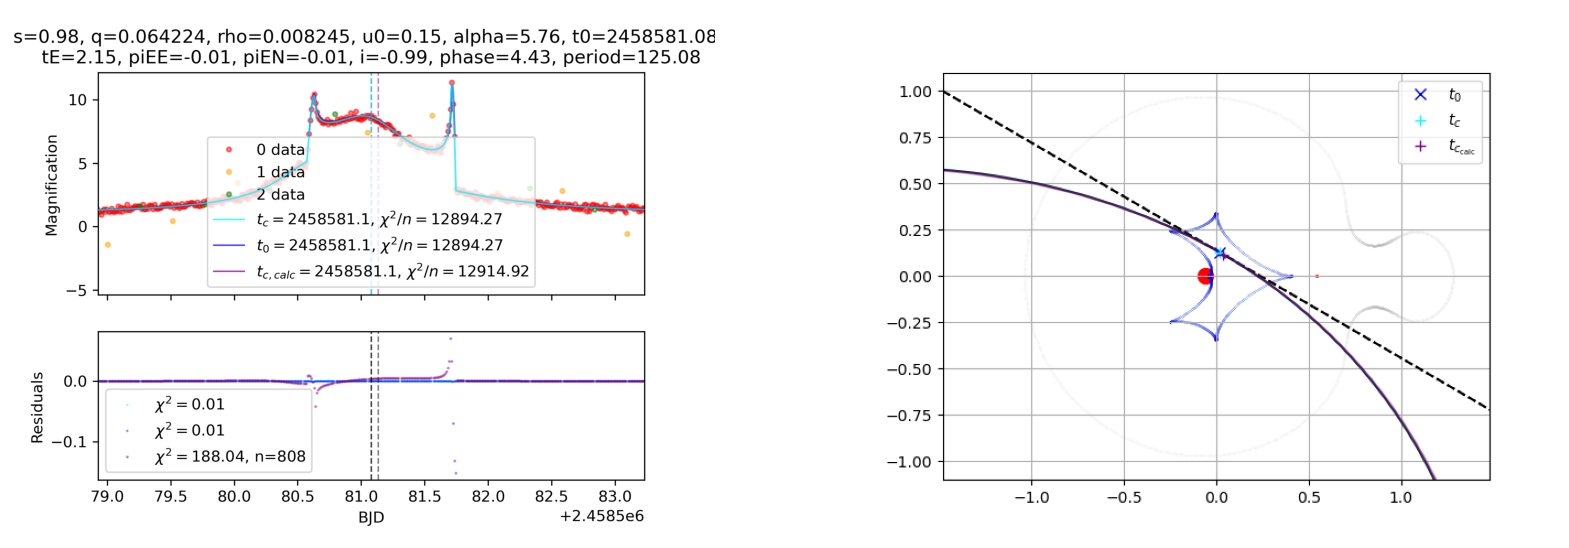

OMPLDG_croin_cassan_0_126_2878.det.lc 126_0_2878


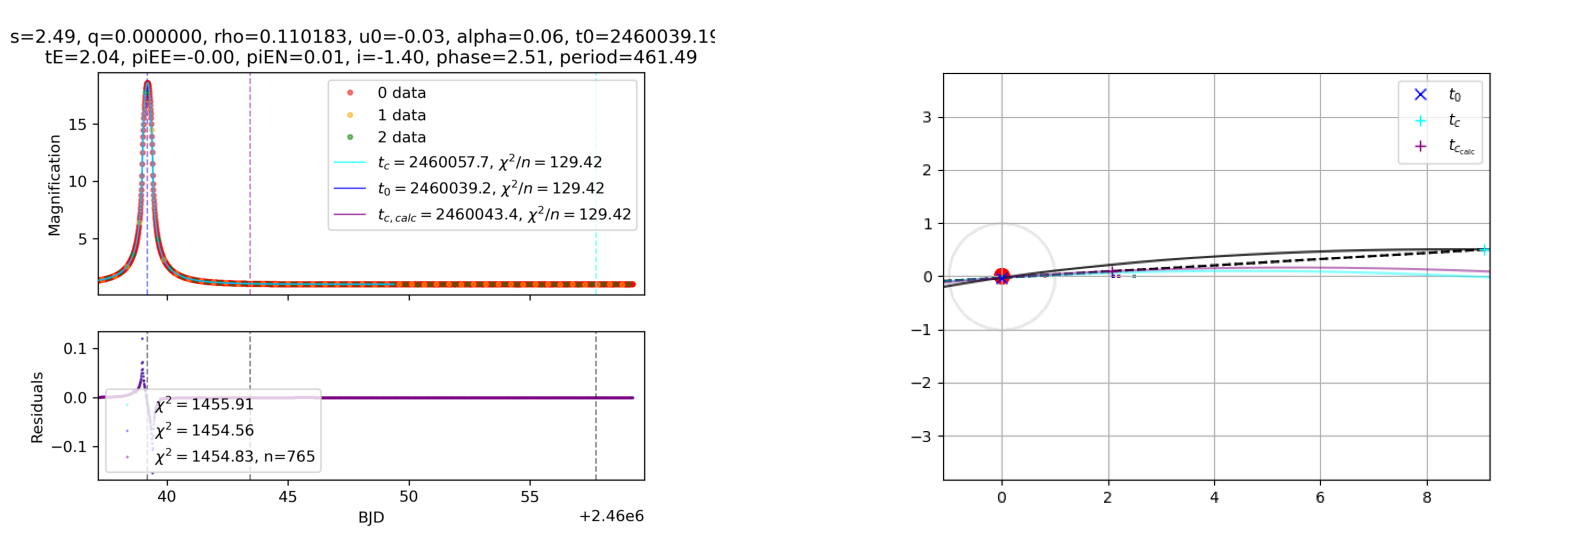

OMPLDG_croin_cassan_0_125_3029.det.lc 125_0_3029
File sample-241113/posteriors/125_0_3029_truths_lightcurve.png does not exist
OMPLDG_croin_cassan_0_166_418.det.lc 166_0_418


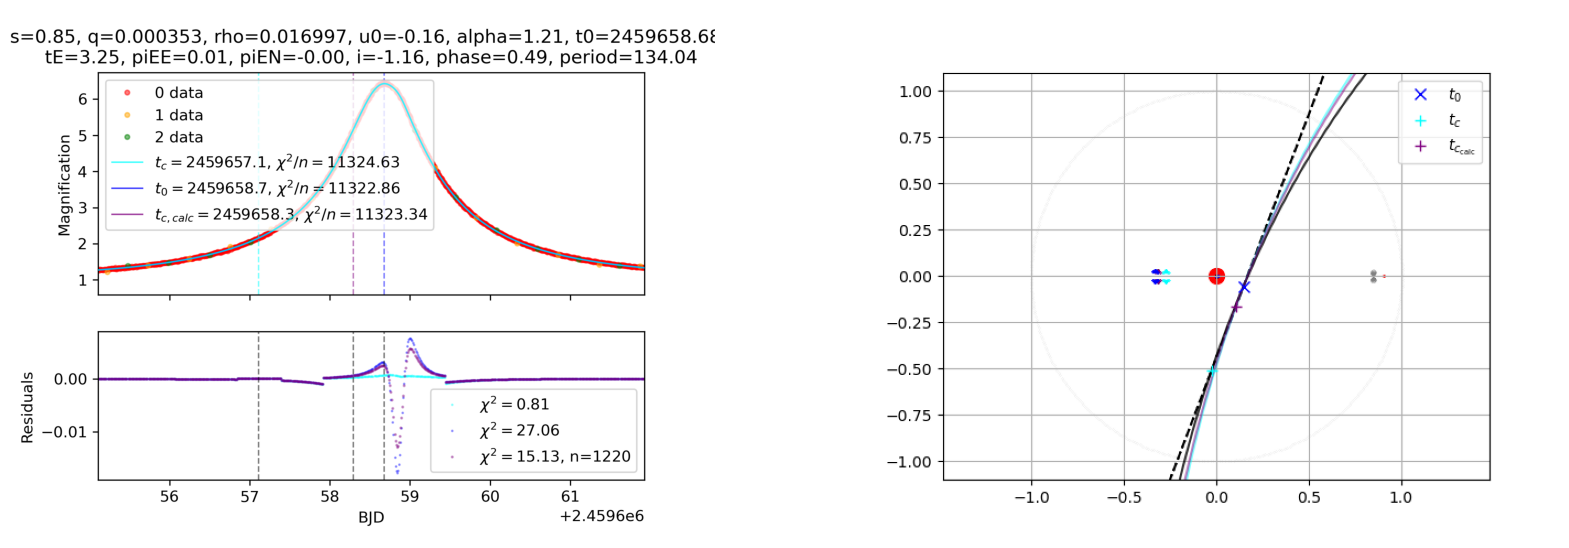

OMPLDG_croin_cassan_0_166_3192.det.lc 166_0_3192


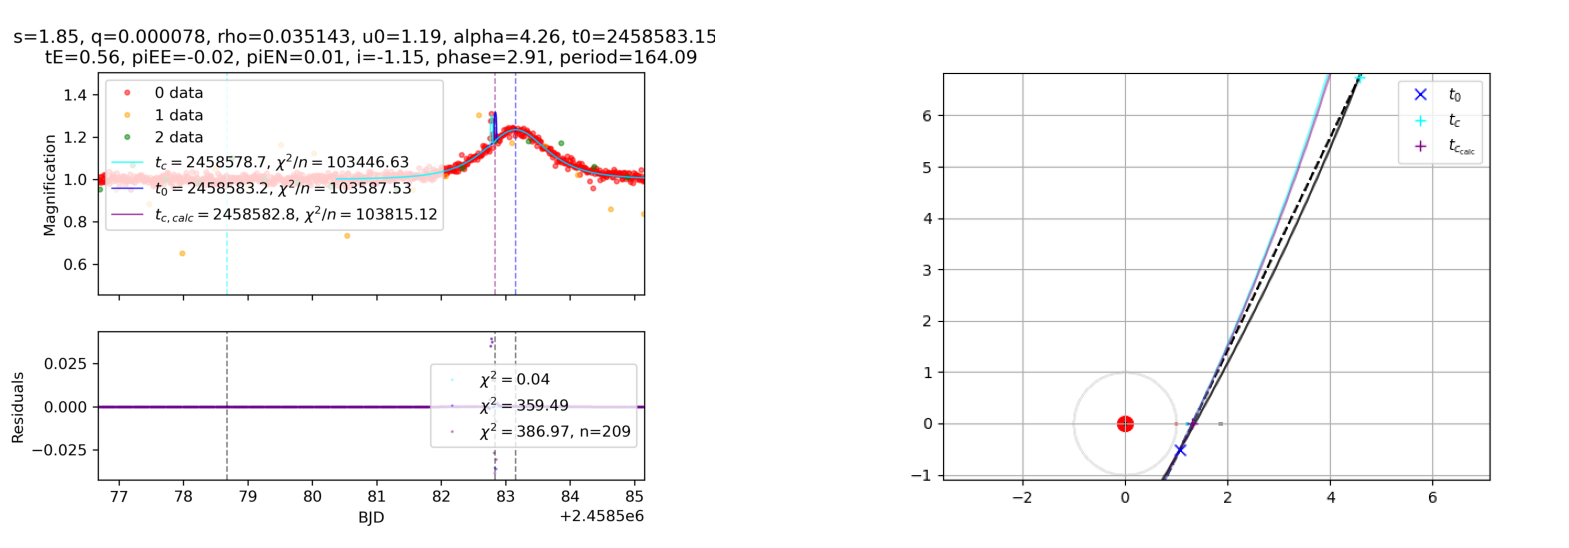

OMPLDG_croin_cassan_0_165_6.det.lc 165_0_6


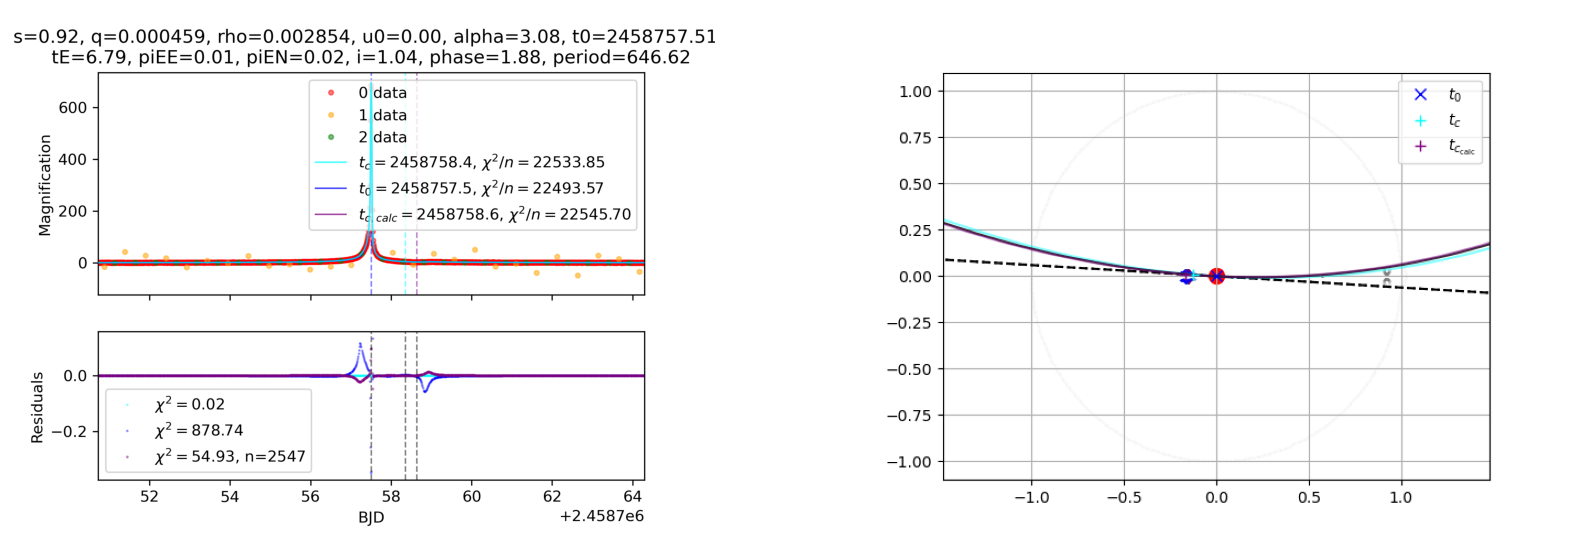

In [50]:
for j in range(n):
    print(lcname_piE_sorted_complete[j], event_name_piE_sorted_complete[j])

    img_path = folder + event_name_piE_sorted_complete[j] + lc_substring
    if not os.path.exists(img_path):
        print(f'File {img_path} does not exist')
    else:    
        lc_img = plt.imread(img_path)

        img_path = folder + event_name_piE_sorted_complete[j] + caustic_substring
        if not os.path.exists(img_path):
            print(f'File {img_path} does not exist')
        else:
            caustic_img = plt.imread(img_path)

            fig, axes = plt.subplots(1, 2, figsize=(20, 10))
            axes[0].imshow(lc_img)
            axes[0].axis('off')
            axes[1].imshow(caustic_img)
            axes[1].axis('off')
            plt.show()

OMPLDG_croin_cassan_0_10_2731.det.lc 10_0_2731


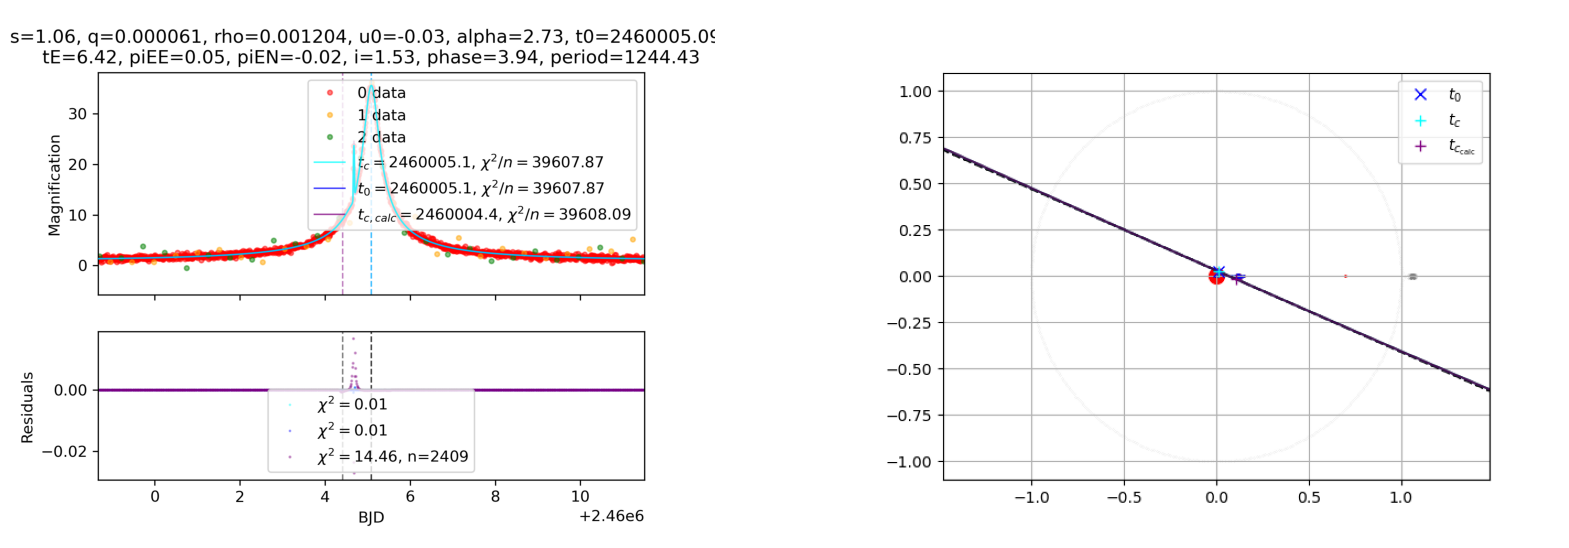

OMPLDG_croin_cassan_0_127_1718.det.lc 127_0_1718


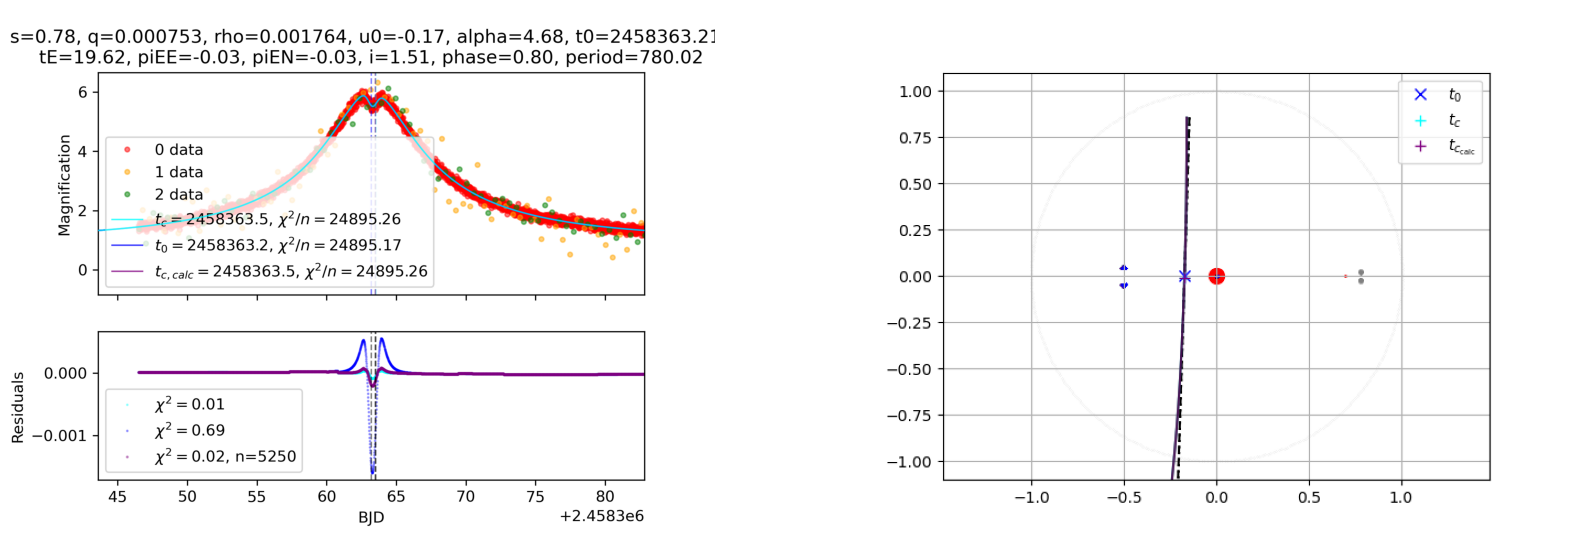

OMPLDG_croin_cassan_0_171_2634.det.lc 171_0_2634


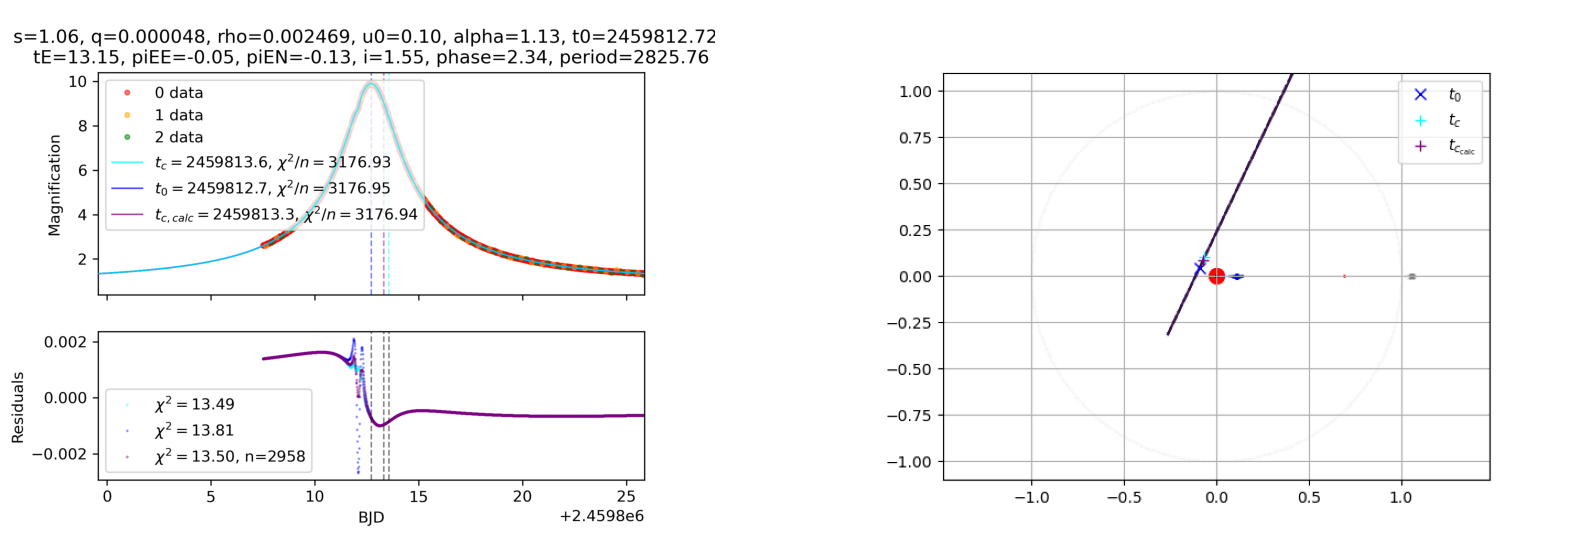

OMPLDG_croin_cassan_0_11_2050.det.lc 11_0_2050


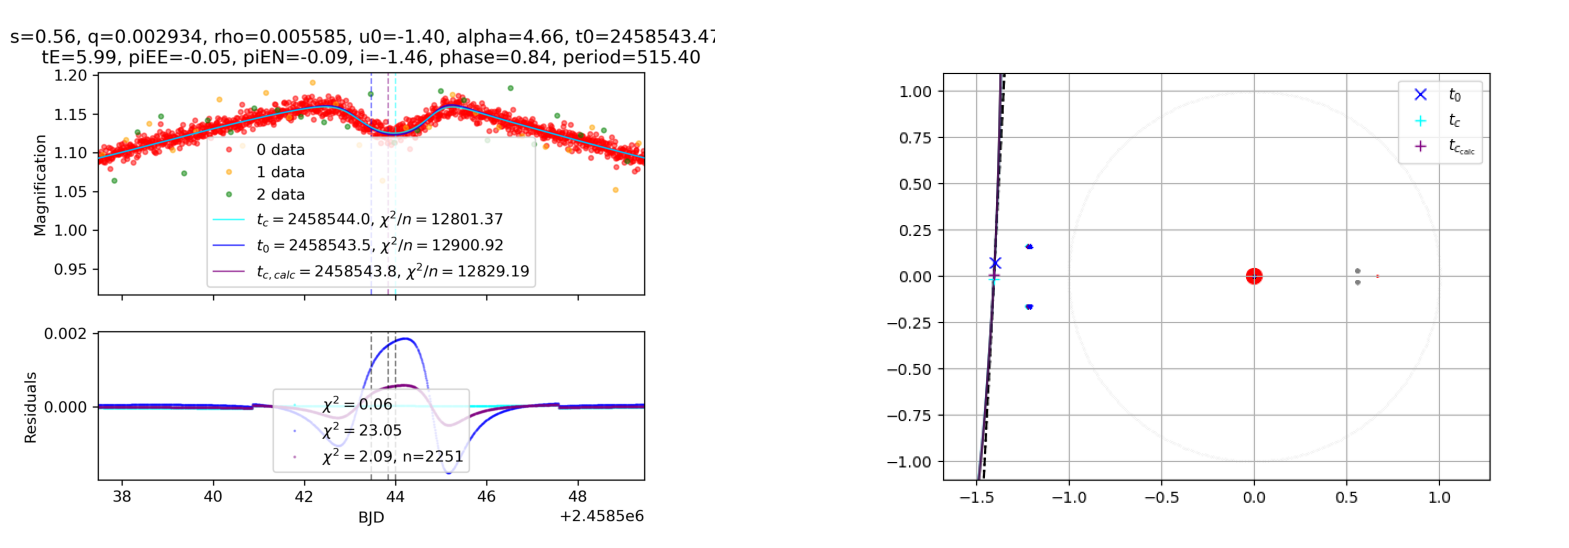

In [47]:
for j in range(n):
    print(lcname_ds_sorted_complete[j], event_name_ds_sorted_complete[j])

    img_path = folder + event_name_ds_sorted_complete[j] + lc_substring
    if not os.path.exists(img_path):
        print(f'File {img_path} does not exist')
    else:    
        lc_img = plt.imread(img_path)

        img_path = folder + event_name_ds_sorted_complete[j] + caustic_substring
        if not os.path.exists(img_path):
            print(f'File {img_path} does not exist')
        else:
            caustic_img = plt.imread(img_path)

            fig, axes = plt.subplots(1, 2, figsize=(20, 10))
            axes[0].imshow(lc_img)
            axes[0].axis('off')
            axes[1].imshow(caustic_img)
            axes[1].axis('off')
            plt.show()

OMPLDG_croin_cassan_0_44_3159.det.lc 44_0_3159


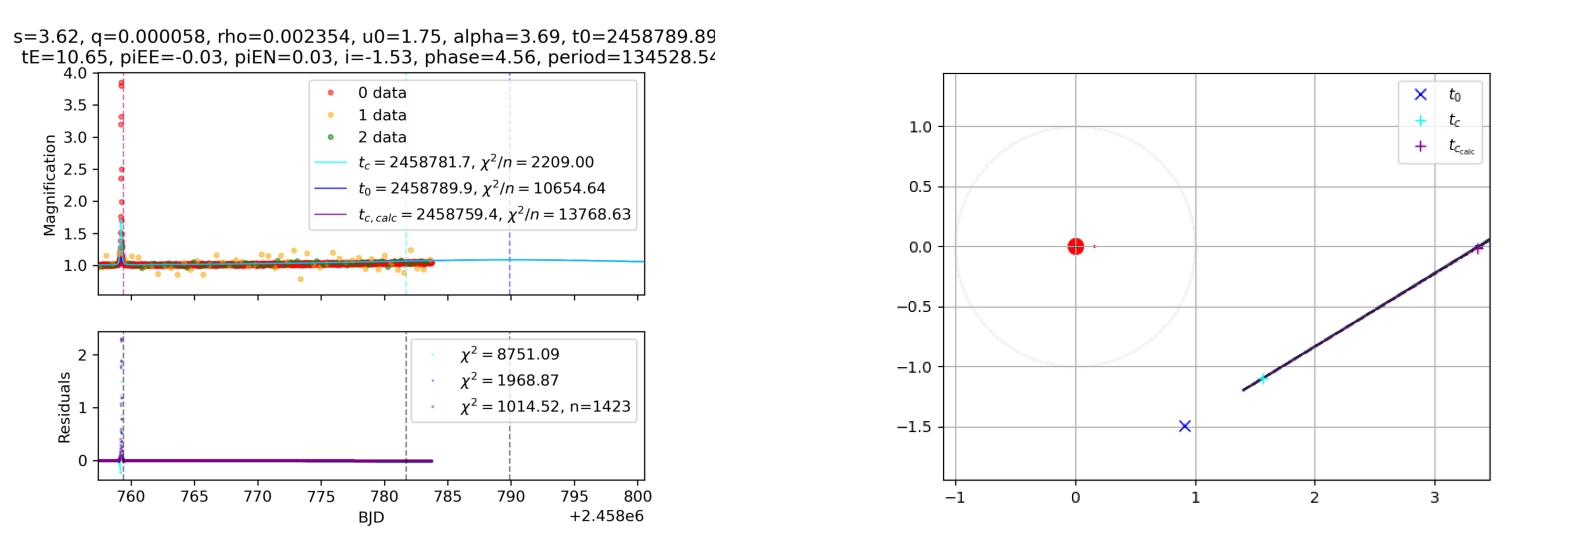

OMPLDG_croin_cassan_0_45_499.det.lc 45_0_499


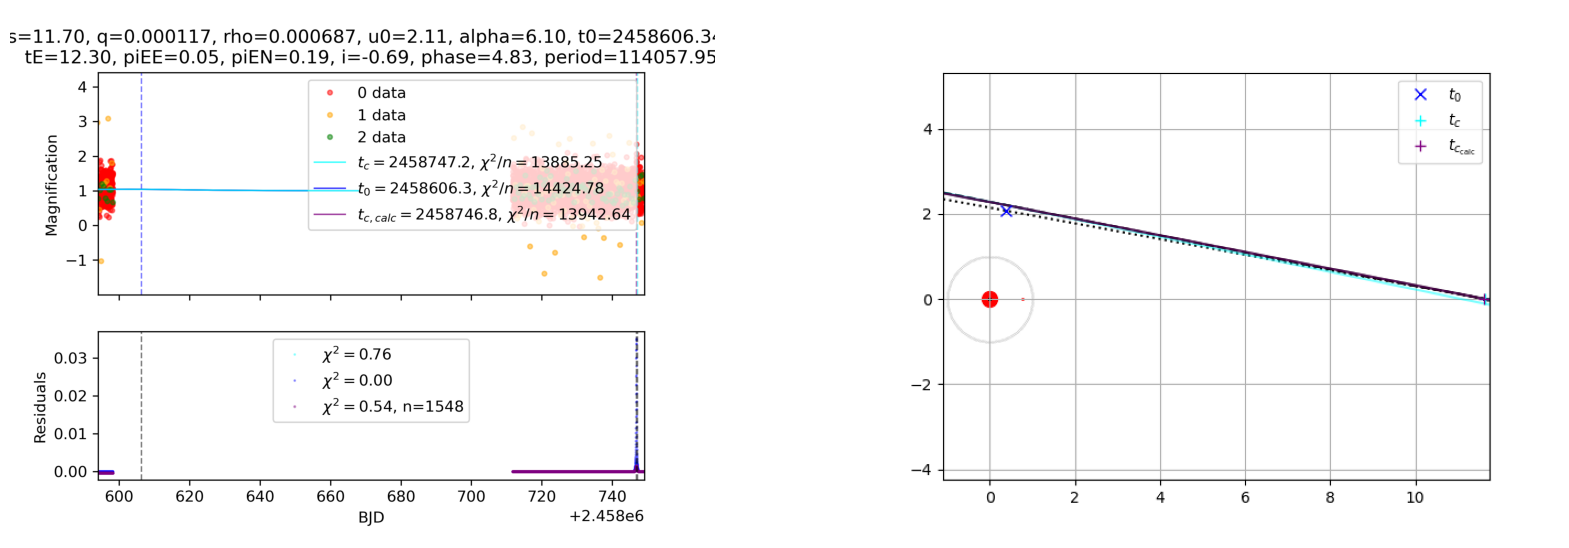

OMPLDG_croin_cassan_0_171_1398.det.lc 171_0_1398


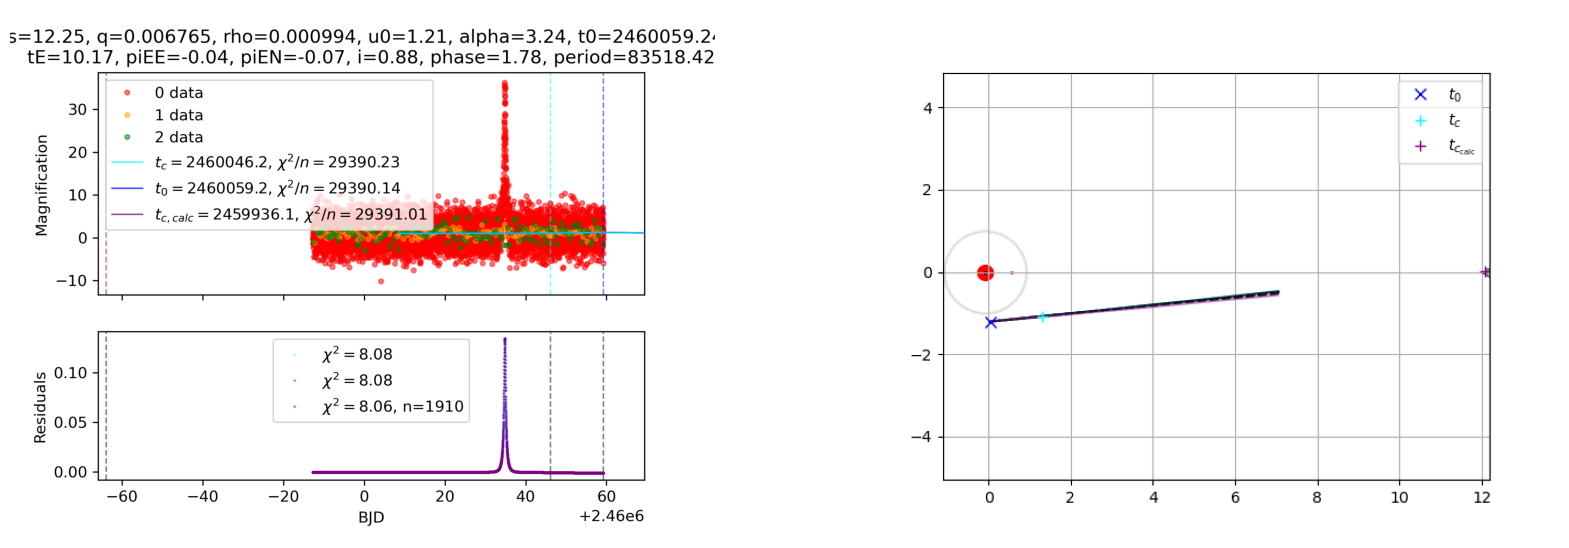

OMPLDG_croin_cassan_0_170_2818.det.lc 170_0_2818


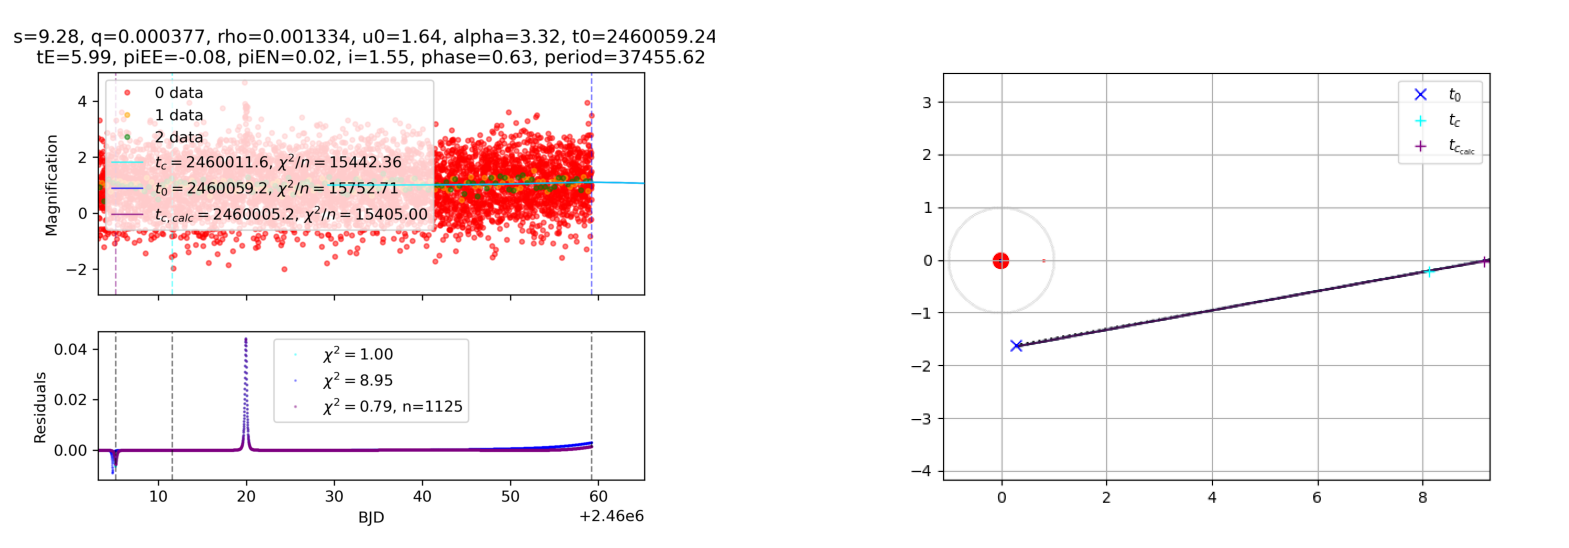

OMPLDG_croin_cassan_0_42_1311.det.lc 42_0_1311


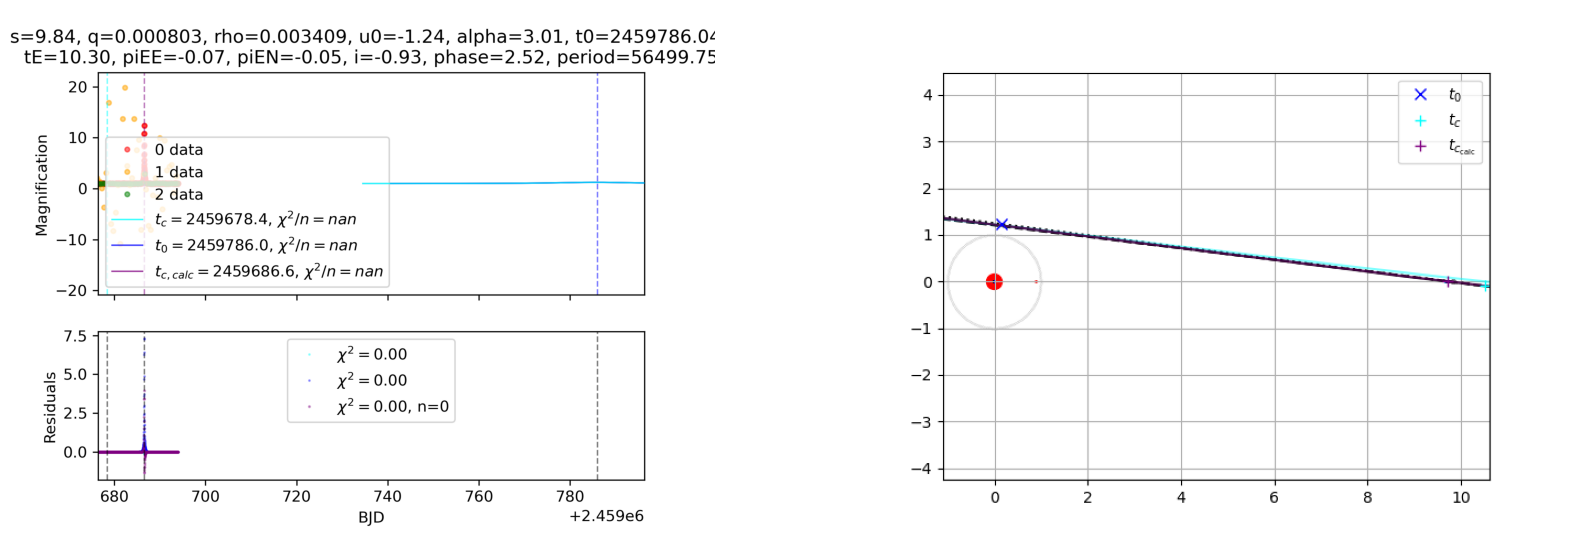

OMPLDG_croin_cassan_0_128_2508.det.lc 128_0_2508


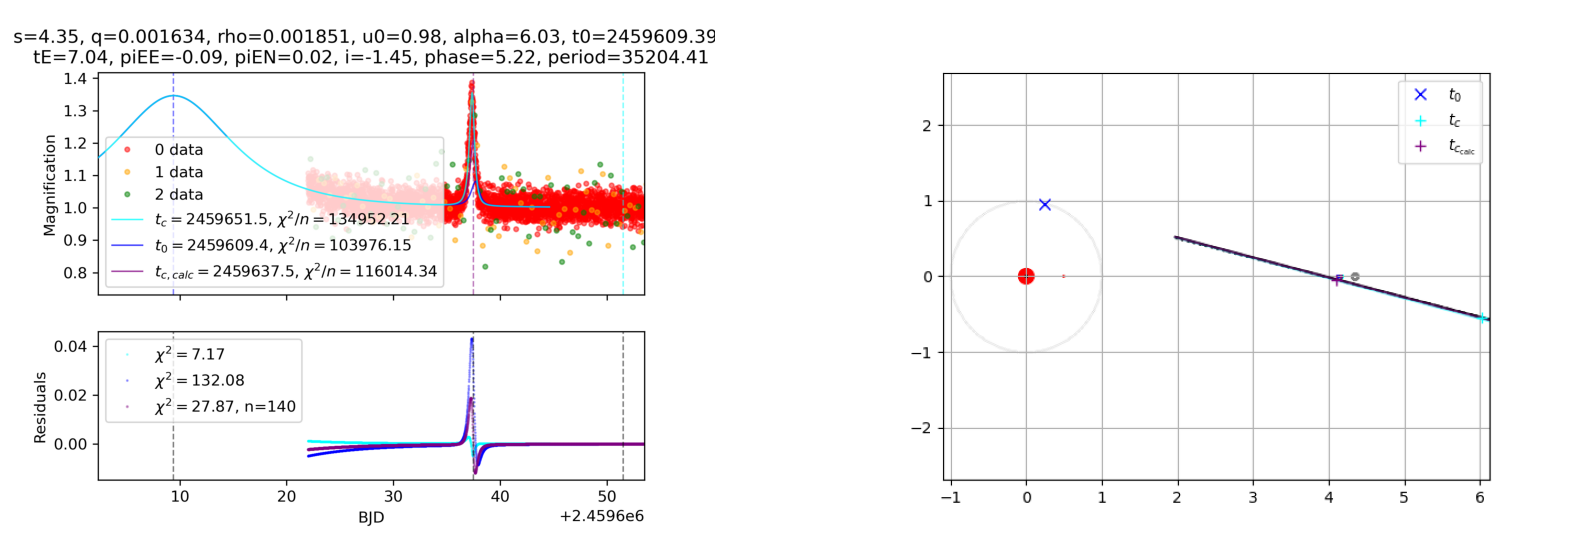

OMPLDG_croin_cassan_0_168_1082.det.lc 168_0_1082


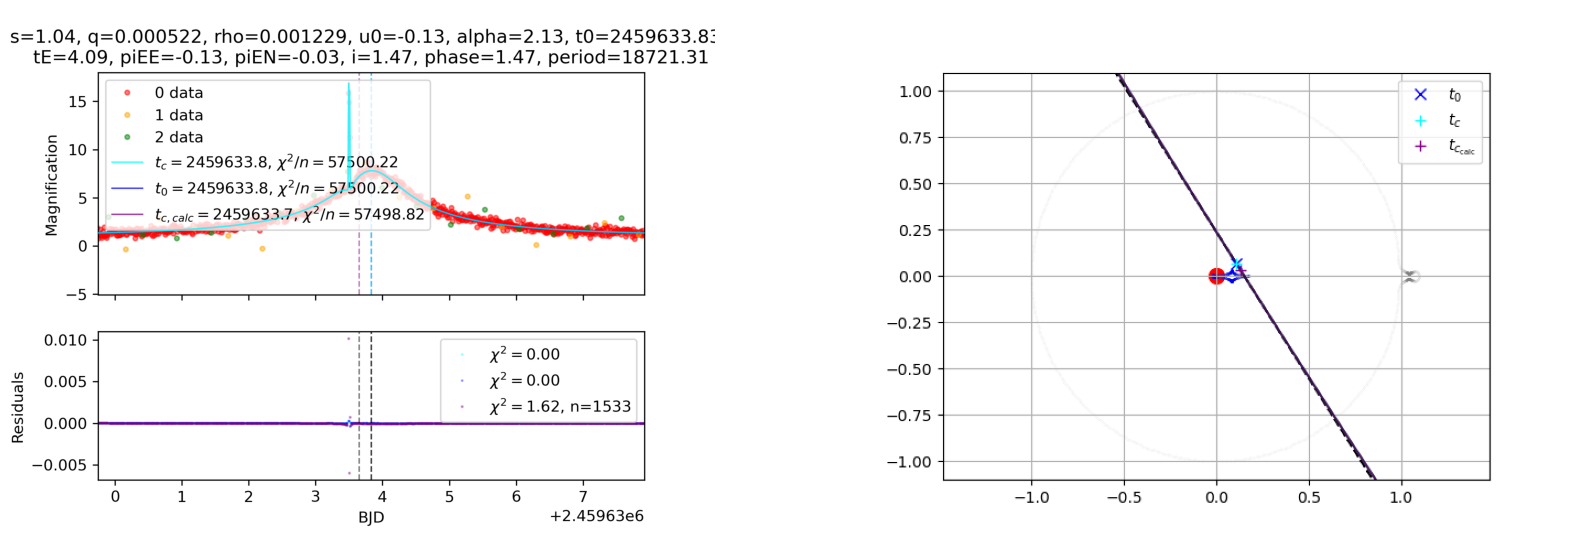

OMPLDG_croin_cassan_0_43_1487.det.lc 43_0_1487


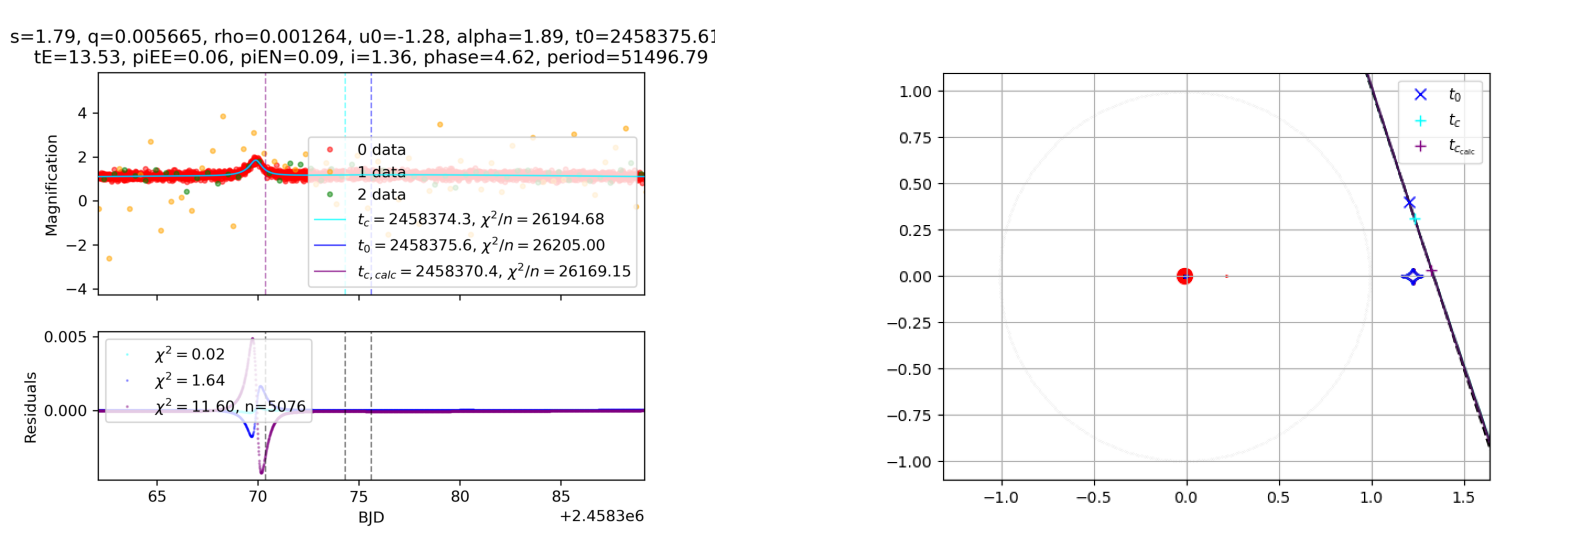

OMPLDG_croin_cassan_0_169_2470.det.lc 169_0_2470


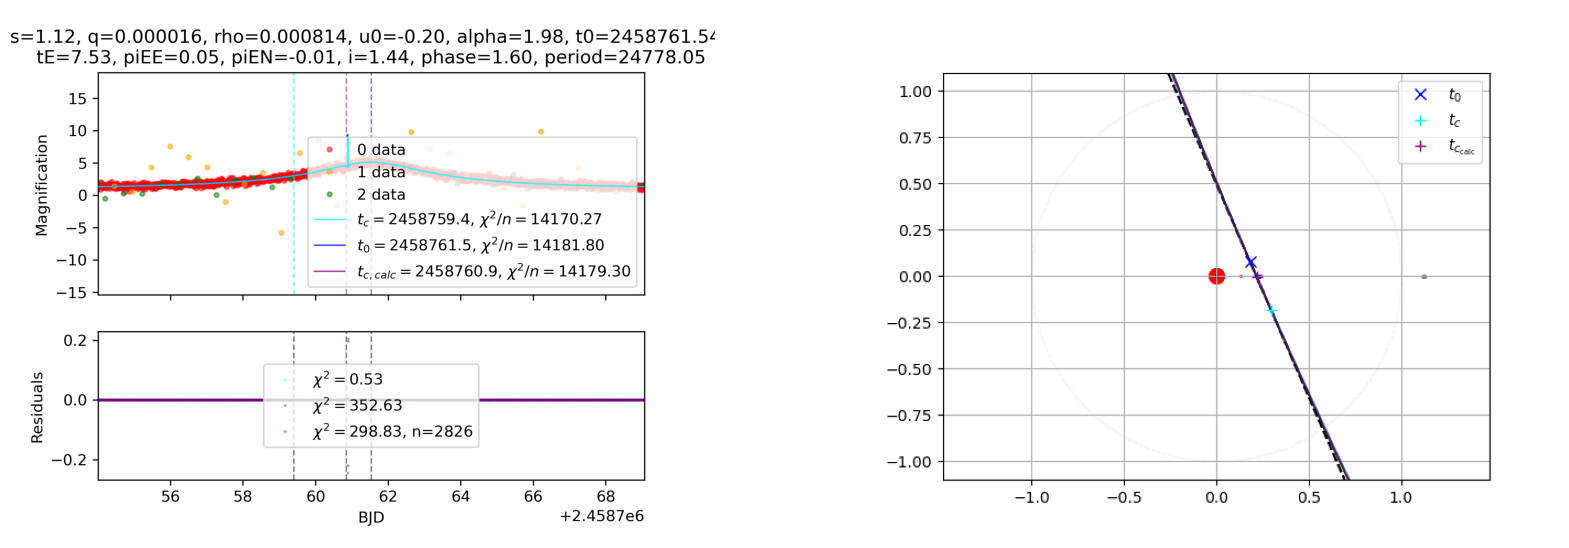

OMPLDG_croin_cassan_0_128_2778.det.lc 128_0_2778


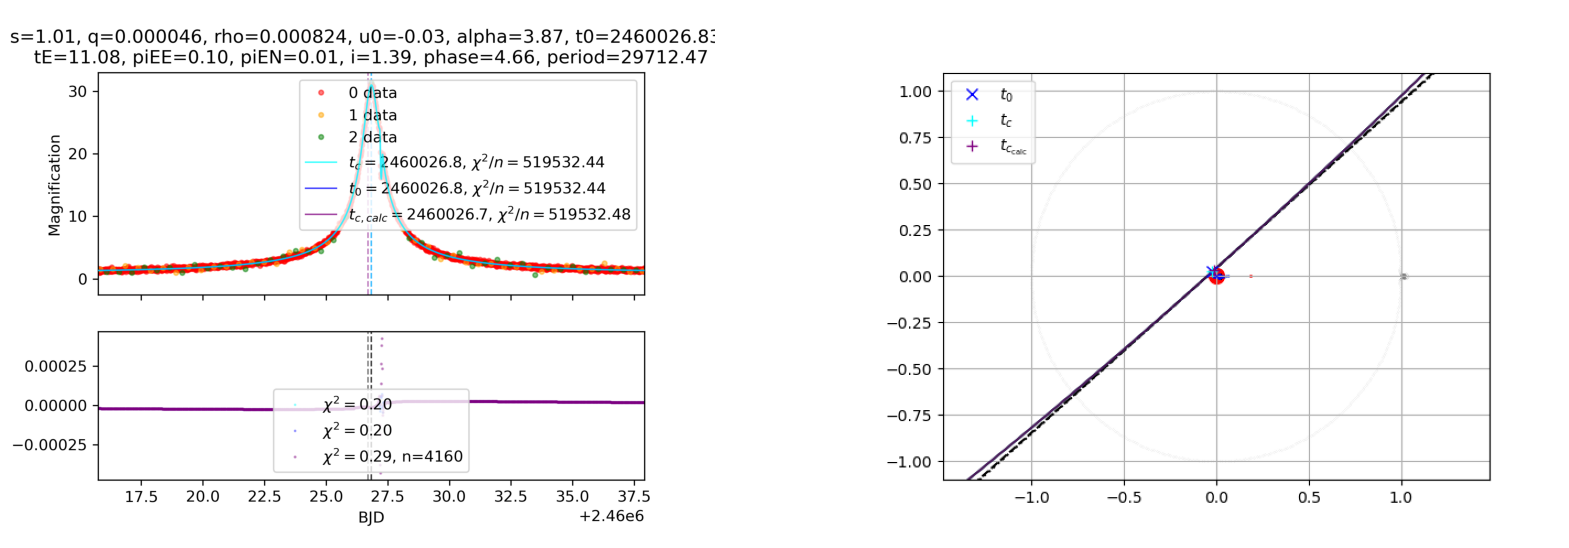

In [51]:
for i in range(10):
    print(lcname_dphi_sorted_complete[i], event_name_dphi_sorted_complete[i])

    img_path = folder + event_name_dphi_sorted_complete[i] + lc_substring
    if not os.path.exists(img_path):
        print(f'File {img_path} does not exist')
    else:    
        lc_img = plt.imread(img_path)

        img_path = folder + event_name_dphi_sorted_complete[i] + caustic_substring
        if not os.path.exists(img_path):
            print(f'File {img_path} does not exist')
        else:
            caustic_img = plt.imread(img_path)

            fig, axes = plt.subplots(1, 2, figsize=(20, 10))
            axes[0].imshow(lc_img)
            axes[0].axis('off')
            axes[1].imshow(caustic_img)
            axes[1].axis('off')
            plt.show()

## State construction

In [76]:
from scipy.stats import truncnorm

ndim = 12
nl = 50  # number of live walkers
mi = 1000  # max iterations
stepi = 100  # steps between saving the sampler 
u0 = np.ones((nl, ndim)) * 0.5
initial_pos = u0 + 1e-4 * np.random.rand(nl, ndim)
labels = ['s', 'q', 'rho', 'u0', 'alpha', 't0', 'tE', 'piEE', 'piEN', 'i', 'phase', 'period']
true_array = np.arange(12)
prange = np.array([0.5]*ndim)
min_array = true_array - prange
max_array = true_array + prange

for i, key in enumerate(labels):
    print(key, initial_pos[:,i])

def normal(u, mu, sig, bounds):
    '''Maps a uniform random variable u (between 0 and 1) to a truncated normal random value x,
    constrained between bounds[0] and bounds[1], with a mean of mu and standard deviation of sig.

    Parameters:
    u (float): Uniform random variable between 0 and 1.
    mu (float): Mean of the normal distribution.
    sig (float): Standard deviation of the normal distribution.
    bounds (tuple): Tuple containing the lower and upper bounds (bounds[0], bounds[1]).

    Returns:
    float: Truncated normal random value x constrained between bounds[0] and bounds[1].
    '''
    # Calculate the lower and upper bounds in terms of the standard normal distribution
    a, b = (bounds[0] - mu) / sig, (bounds[1] - mu) / sig
    
    # Create a truncated normal distribution
    trunc_normal = truncnorm(a, b, loc=mu, scale=sig)
    
    # Map the uniform random variable to the truncated normal distribution
    if u.ndim == 2:
        x = np.zeros_like(u)
        print(u.shape)
        for i in range(u.shape[0]):
            print('\n\n\n\n', u[i])
            x[i] = trunc_normal.ppf(u[i])
    else:
        x = trunc_normal.ppf(u)
    
    return x

x = normal(initial_pos, true_array, prange/5.0, [min_array, max_array])


s [0.5000307  0.50008501 0.50009199 0.50009921 0.50006785 0.50008576
 0.50003592 0.50005798 0.50007739 0.50009967 0.50003042 0.5000394
 0.50005672 0.50000228 0.50004607 0.50001608 0.50003697 0.50005878
 0.50009067 0.50008543 0.50001833 0.50009041 0.50006553 0.50002646
 0.50001754 0.50005796 0.50004843 0.50001631 0.50008813 0.5000247
 0.50002993 0.50002876 0.50003538 0.50004313 0.50009664 0.50006117
 0.50006066 0.50002485 0.50001328 0.50000691 0.50003406 0.50002113
 0.50003394 0.50004136 0.50005179 0.50004368 0.50001877 0.5000366
 0.50002775 0.50002334]
q [0.5000291  0.50004834 0.50002097 0.50009822 0.50004351 0.50000065
 0.50001234 0.50002486 0.50003461 0.50006851 0.50002558 0.50002378
 0.50009694 0.50009466 0.50009458 0.50005795 0.50007742 0.5000833
 0.50000049 0.50001717 0.5000655  0.50006802 0.50007661 0.50006026
 0.50000962 0.50005813 0.50006173 0.50007101 0.5000748  0.50009424
 0.50002567 0.50000689 0.50002337 0.50007978 0.50008093 0.50004203
 0.50006268 0.50009244 0.50009041 0.50

## Histograms with Jon

In [2]:
print(runlist)

[['h']
 ['i']]


In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('repsample/OMPLLD_croin_cassan_0.sample.csv')

# Display the first few rows of the dataframe
print(df.head())



   EventID  SubRun  Field  galactic_l  galactic_b      ra_deg    dec_deg  \
0      148      10      0    0.967270   -1.530864  268.473078 -28.892627   
1      549      10      0    1.000202   -1.450253  268.412753 -28.823413   
2      578      10      0    0.956517   -1.526617  268.462678 -28.899746   
3      589      10      0    0.984075   -1.525601  268.477607 -28.875476   
4      709      10      0    0.974666   -1.484763  268.431956 -28.862906   

   SourceID  Source_mul  Source_mub  ...  ObsGroup_1_flatlc  \
0     33118   -6.300858   -2.376964  ...                  0   
1     44428   -5.514805   -1.729932  ...                  0   
2     50095   -6.950542    0.916188  ...                  0   
3     45812   -9.849052    0.295055  ...                  0   
4     49920   -6.906426    0.055558  ...                  0   

   ObsGroup_1_flatchi2  ObsGroup_1_FiniteSourceflag  ObsGroup_1_chi2  \
0         1.520081e+05                            0       317.063424   
1         2.896727e+

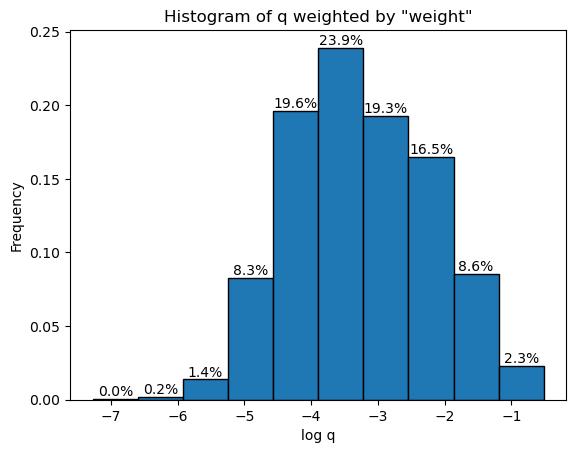

In [4]:
plt.close(1)
plt.figure(1)

# Assuming df is already loaded
weights = df['weight'] / np.sum(df['weight'])
hist, bins, _ = plt.hist(np.log10(df['Planet_q']), weights=weights, bins=10, edgecolor='black')

# Add numbers on the bars
for i in range(len(hist)):
    percent = hist*100
    plt.text((bins[i] + bins[i+1]) / 2, hist[i], f'{percent[i]:.1f}%', ha='center', va='bottom')

plt.xlabel('log q')
plt.ylabel('Frequency')
plt.title('Histogram of q weighted by "weight"')
plt.show()

1027,25,0,1.01532458663,-1.485336768627,268.4560215194,-28.8281502948,6216,-3.9142481,-0.1374789,-76.37412,-61.134185,104.66942,5.0351757,0.5636494,0.0,10.0,3795.0456,4.7288826,0.0,0.56362927,7.9213748,0.53699247,0.26029399,0.99993696,-1.503067,268.46338,-28.85038,7.5243539,-0.65780703,0.13126462,-0.19600026,2.1298013,0.0,1258,-9.6468765,-0.38073051,-278.22647,-260.05083,-73.822091,3.2255157,0.17853431,0.0,10.0,3048.9766,5.0794097,0.0,0.17853234,11.068474,0.19528735,0.14634275,0.99680111,-1.5016442,268.46016,-28.852363,6.8799578,-1.3018354,0.11964666,-0.17758787,2.1298013,0.0,-0.07370674832867,294.1558670998,547.1680069603,546.7319503427,0.2572498321533,0.1528271573069,8.602541756481,8.564985794413,0.9256922320606,0.1345491148304,0.002466443037032,0.09251604741375,-0.0824132561984,-0.04203896087966,-2.752030744994,-5.034732018376,-5.7350726629,-0.1764688910681,-2.697667548224,-5.064068474805,42.43300830706,-2.713484595858,-5.027163496862,-5.709026807131,-0.2058746987994,-2.659205115386,-5.056085405771,241.472200814,2510.931374058,2501.231451215,16.41714769648,-2216.103247124,-1180.534947943,-2213.726694307,-1164.290726349,-2.376552817581,-16.24422159395,-0.03490211487225,0.07210799958662,187.1335437619,0.0,9.948285246913e-07,1.187897312689,-57.67544220697,126.3304026417,5.572259483583e-06,0.939979002491,3.064140613132,0.1528271573069,1.544024023453,0.234938637555,26.149226,23.678069,22.787005,22.186567,22.141618,21.755848,21.685846,21.77452,19.940015,21.395884,20.302053,32.149746,30.079742,27.33495,23.798727,25.669898,26.088889,24.312057,23.384783,31.936755,28.884798,25.986626,24.440378,23.026942,25.704111,27.724379,24.026335,23.093245,22.295827,21.31535,20.306368,19.949336,30.205333,26.818173,25.603947,24.929605,24.950473,24.547604,24.580046,24.475807,22.641302,24.086855,23.05858,36.8672,34.852112,31.926734,27.177578,29.746087,29.887589,27.624521,26.409046,35.816386,33.424599,30.339741,27.890311,25.930957,29.3917,32.310088,27.424691,26.235874,25.19509,23.993744,23.07304,22.670695,0.2638650892795,0.2913324740061,0.08890619904205,3,0,0,7410509.902066,0,89.39296200792,0,7389710.156917,0,89.82936579475,0,7399174.644732,0,89.68988185045,1,OMPLLD_croin_cassan_0_25_1027.det.lc


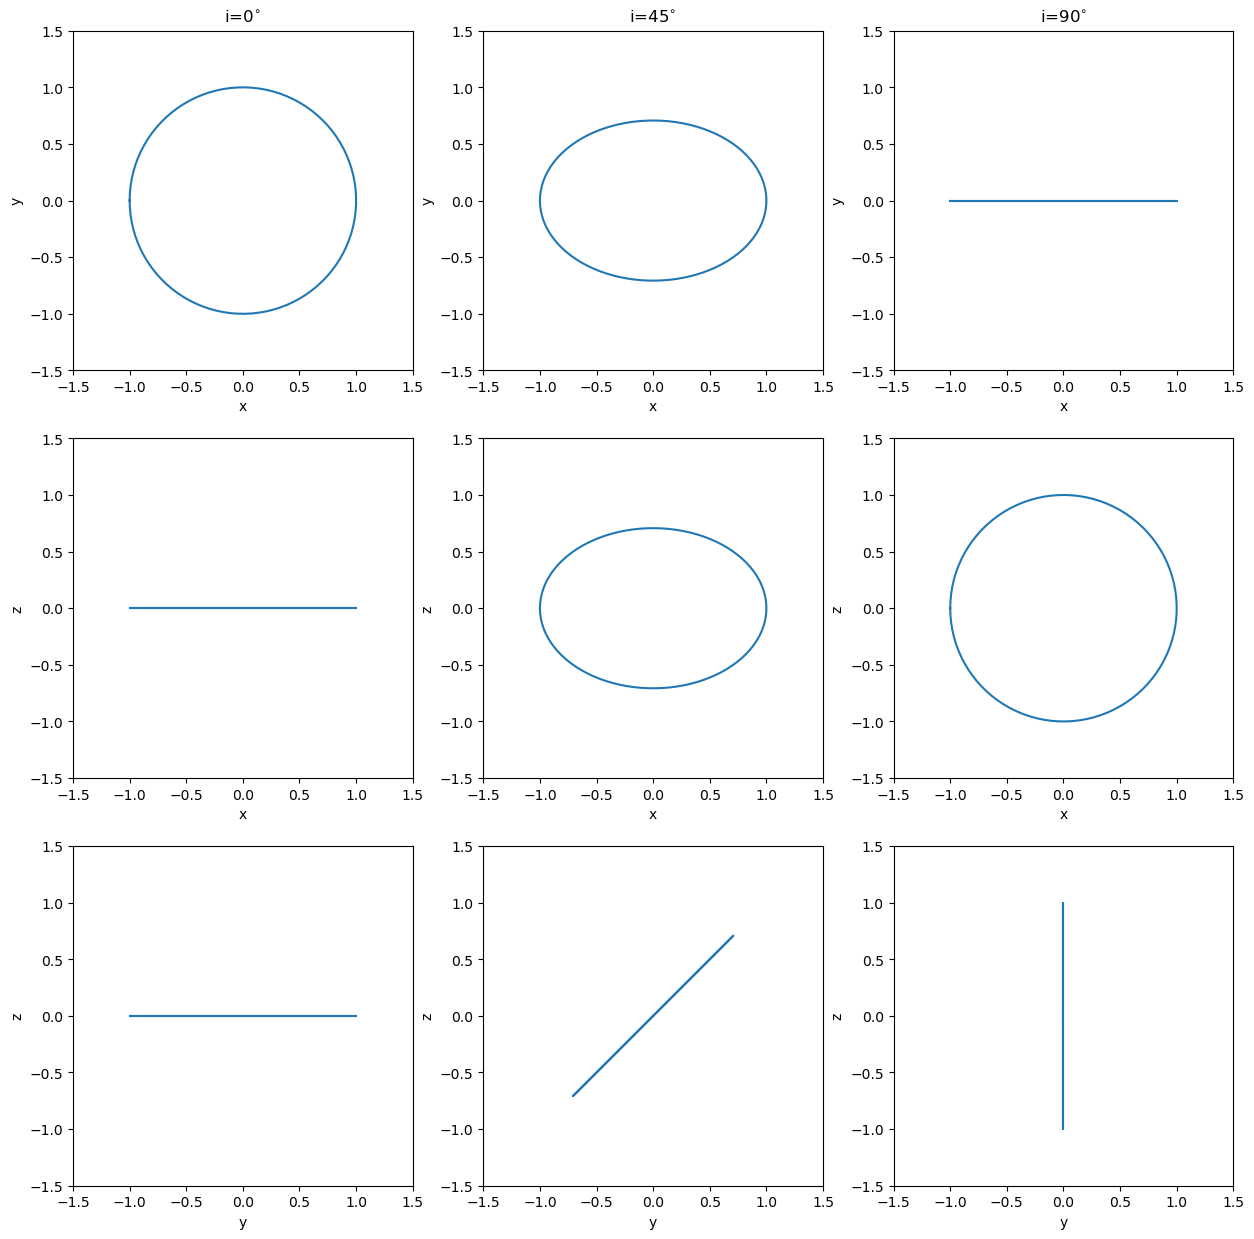

In [5]:
tau = np.linspace(-1.5, 1.5, 100)
period = 3.0
phase_offset = 0.0
a = 1.0
phase = 2 * np.pi * (tau) / period + phase_offset

i = np.array([0.0, np.pi/4, np.pi/2])
x = a * np.cos(phase)
z = [0, 0, 0]
y = [0, 0, 0]
for j in range(3):
    y[j] = a * np.sin(phase) * np.cos(i[j])
    z[j] = a * np.sin(phase) * np.sin(i[j])


plt.close(2)
fig, axes = plt.subplots(3, 3, figsize=(15, 15), num=2)

for j in range(3):
    axes[0, j].plot(x, y[j])
    axes[0, j].set_xlabel('x')
    axes[0, j].set_ylabel('y')
    axes[0, j].set_aspect('equal')
    axes[0, j].set_xlim(-1.5, 1.5)
    axes[0, j].set_ylim(-1.5, 1.5)

    axes[1, j].plot(x, z[j])
    axes[1, j].set_xlabel('x')
    axes[1, j].set_ylabel('z')
    axes[1, j].set_aspect('equal')
    axes[1, j].set_xlim(-1.5, 1.5)
    axes[1, j].set_ylim(-1.5, 1.5)

    axes[2, j].plot(y[j], z[j])
    axes[2, j].set_xlabel('y')
    axes[2, j].set_ylabel('z')
    axes[2, j].set_aspect('equal')
    axes[2, j].set_xlim(-1.5, 1.5)
    axes[2, j].set_ylim(-1.5, 1.5)

    text = f'i={i[j]*180/np.pi:.0f}'
    axes[0, j].set_title(text + r'$^{\circ}$')

plt.show()



I shouldn't need to worry about + or - inclinations because the projection ends up the same.

In [6]:
import numpy as np

def projected_seperation(i, period, t, phase_offset=0.0, a=1.0):
    '''Calculate the projected seperation of the binary'''

    # i is the inclination of the orbit in radians
    # period is the period of the orbit (if t is tau then phase is in units of tE)
    # t is the time
    # phase_offset is the phase at t0
    # a is the semi-major axis of the orbit

    phase = 2 * np.pi * (t) / period + phase_offset
    x = a * np.cos(phase)
    y = a * np.sin(phase) * np.cos(i)
    z = a * np.sin(phase) * np.sin(i)

    # if an inclination of 0 means birds eye view, then use x, y (row 1 in the plots above)
    #s = np.sqrt(x**2 + y**2)

    # if an inclination of 0 means edge on view, then use x, z (row 2 in the plots above)
    s = np.sqrt(x**2 + z**2)

    return s

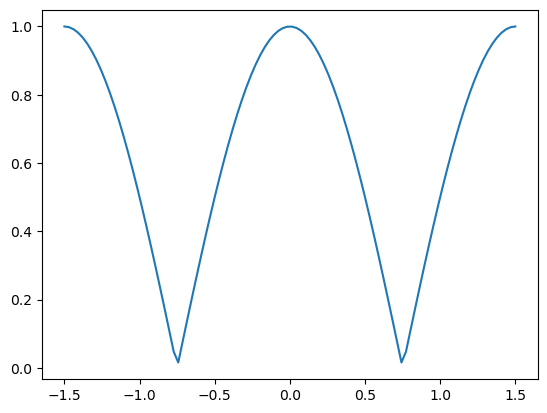

1.0


In [7]:
tau = np.linspace(-1.5, 1.5, 100)
s = projected_seperation(0, 3.0, tau, 0.0)

plt.close(3)
plt.figure(3)
plt.plot(tau, s)
plt.show()

s0 = projected_seperation(0, 3.0, 0, 0.0)
print(s0)


The phase needs to be between -np.pi/2 and np.pi/2 and more ofteh drawn as 0.0

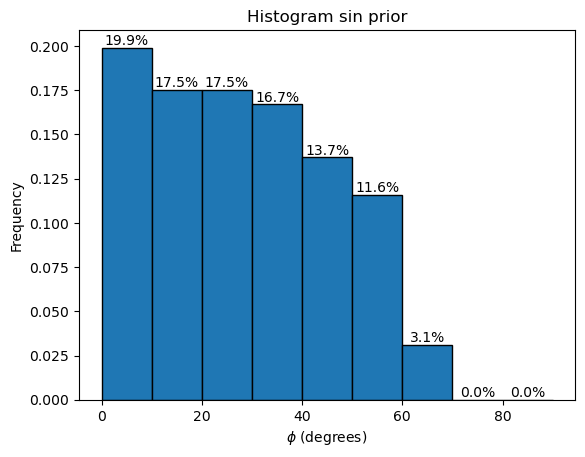

In [8]:
rnd = np.random.uniform(0, 1)
n = 1000
rnd_array = np.sort(np.random.uniform(0.0, 0.9, size=n))
hist, bins, _ = plt.hist(np.arcsin(rnd_array)*180/np.pi, weights=np.ones(n)/n, bins=9, range=(0, 90), edgecolor='black')

# Add numbers on the bars
for i in range(len(hist)):
    percent = hist*100
    plt.text((bins[i] + bins[i+1]) / 2, hist[i], f'{percent[i]:.1f}%', ha='center', va='bottom')

plt.xlabel(r'$\phi$ (degrees)')
plt.ylabel('Frequency')
plt.title('Histogram sin prior')
plt.show()

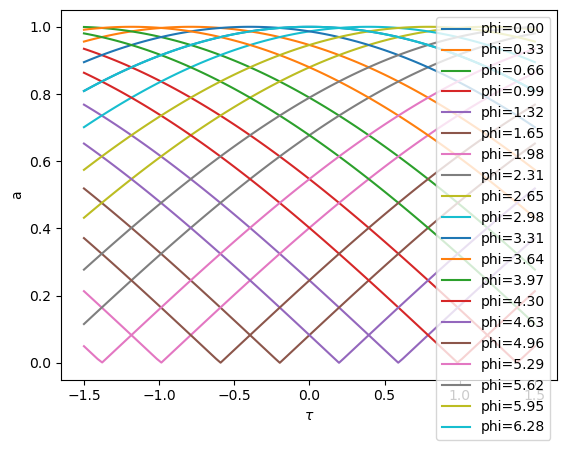

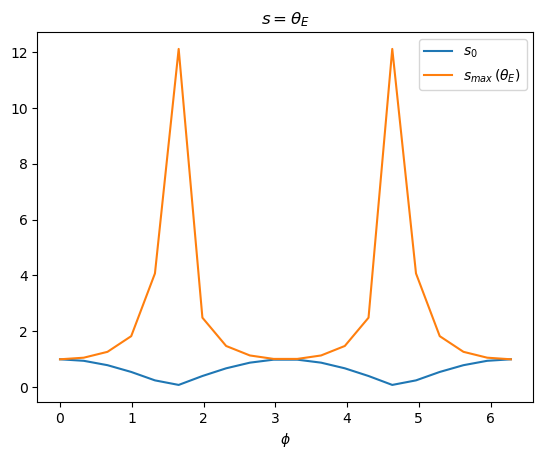

In [9]:
i = 0.0
period = 15.0
tau = np.linspace(-1.5, 1.5, 100)

plt.close(4)
plt.figure(4)

S0 = []

phase_offset = np.linspace(0, 2*np.pi, 20)
for phi in phase_offset:
    s = projected_seperation(i, period, tau, phi)
    s0 = projected_seperation(i, period, 0.0, phi)
    S0.append(s0)
    a = s0/s
    plt.plot(tau, s, label=f'phi={phi:.2f}')

plt.xlabel(r'$\tau$')
plt.ylabel('a')
plt.legend()
plt.show()

plt.close(5)
plt.figure(5)
plt.plot(phase_offset, S0, label=r'$s_0$')
plt.plot(phase_offset, 1.0/np.array(S0), label=r'$s_{max} \, (\theta_E)$')
plt.title(r'$s=\theta_E$')
plt.xlabel(r'$\phi$')
plt.legend()
plt.show()

In [10]:
def projected_seperation(i, period, t, phase_offset=0.0, a=1.0):
    '''Calculate the projected seperation of the binary'''

    # i is the inclination of the orbit in radians
    # period is the period of the orbit (if t is tau then period is in units of tE)
    # t is the time
    # phase_offset is the phase at t0
    # a is the semi-major axis of the orbit

    phase = 2 * np.pi * (t) / period + phase_offset
    x = a * np.cos(phase)
    y = a * np.sin(phase) * np.cos(i)
    z = a * np.sin(phase) * np.sin(i)

    # if an inclination of 0 means birds eye view, then use x, y (row 1 in the plots above)
    #s = np.sqrt(x**2 + y**2)

    # if an inclination of 0 means edge on view, then use x, z (row 2 in the plots above)
    s = np.sqrt(x**2 + z**2)

    return s

def corrected_phi(i, period, t, phase_offset=0.0, a=1.0):
    '''Calculate the corrected phase'''

    # i is the inclination of the orbit in radians
    # period is the period of the orbit (if t is tau then period is in units of tE)
    # t is the time
    # phase_offset is the phase at t0
    # a is the semi-major axis of the orbit

    phase = 2 * np.pi * (t) / period + phase_offset
    x = a * np.cos(phase)
    y = a * np.sin(phase) * np.cos(i)
    z = a * np.sin(phase) * np.sin(i)

    x0 = a * np.cos(phase_offset)
    y0 = a * np.sin(phase_offset) * np.cos(i)
    z0 = a * np.sin(phase_offset) * np.sin(i)

    # if an inclination of 0 means birds eye view, then use x, y (row 1 in the plots above)
    #phi_0 = np.arctan2(y0, x0)
    #phi = np.arctan2(y, x)
    #delta_phi = phi - phi_0

    # if an inclination of 0 means edge on view, then use x, z (row 2 in the plots above)
    phi_0 = np.arctan2(z0, x0)
    phi = np.arctan2(z, x)
    delta_phi = phi - phi_0

    return phase  

## Loading horizons data

In [11]:
import scipy
from scipy.interpolate import interp1d
from astropy.coordinates import CartesianRepresentation

import scipy
from scipy.interpolate import interp1d
from astropy.coordinates import CartesianRepresentation

def read_horizons_data(position_file):
    with open(position_file, 'r') as file:
        lines = file.readlines()

    # this is probably inefficient but idc
    jd, x, y, z, vx, vy, vz = [], [], [], [], [], [], []  

    for line in lines:
        if line.startswith('$$EOE'):
            break
        if line.startswith('2460'):
            parts = line.split()
            jd.append(float(parts[0]))
            x.append(float(parts[2]))
            y.append(float(parts[4]))
            z.append(float(parts[6]))
            vx.append(float(parts[8]))
            vy.append(float(parts[10]))
            vz.append(float(parts[12]))

    jd = np.array(jd)
    x = np.array(x) * u.au
    y = np.array(y) * u.au
    z = np.array(z) * u.au
    vx = np.array(vx) * (u.au / u.day)
    vy = np.array(vy) * (u.au / u.day)
    vz = np.array(vz) * (u.au / u.day)

    times = Time(jd, format='jd', scale='tdb')
    positions = CartesianRepresentation(x, y, z)
    velocities = CartesianDifferential(vx, vy, vz)

    return times, positions.with_differentials(velocities)

file = './repsample/horizons_results.txt'
times, positions = read_horizons_data(file)

print(times)

screw this. there's an astroquerry; i'll try that.

In [12]:
from astropy.coordinates import SkyCoord, CartesianRepresentation, CartesianDifferential
from astropy.time import Time
from astroquery.jplhorizons import Horizons

def fetch_horizons_data(target, location, start_time, end_time, n_epochs, refplane='ecliptic'):
    times = np.linspace(start_time.jd, end_time.jd, n_epochs)
    times = Time(times, format='jd')

    positions_list = []
    velocities_list = []

    # Split the times into chunks to avoid hitting the API limits
    chunk_size = 75  # Adjust this based on the API limits
    for i in range(0, len(times), chunk_size):
        chunk_times = times[i:i + chunk_size]
        q = Horizons(id=target, location=location, epochs=chunk_times.jd)
        data = q.vectors(refplane=refplane)

        positions_list.append(CartesianRepresentation(data['x'], data['y'], data['z']))
        velocities_list.append(CartesianDifferential(data['vx'], data['vy'], data['vz']))

    # Combine the chunks into single arrays
    positions = CartesianRepresentation(
        np.concatenate([pos.x for pos in positions_list]),
        np.concatenate([pos.y for pos in positions_list]),
        np.concatenate([pos.z for pos in positions_list])
    )
    velocities = CartesianDifferential(
        np.concatenate([vel.d_x for vel in velocities_list]),
        np.concatenate([vel.d_y for vel in velocities_list]),
        np.concatenate([vel.d_z for vel in velocities_list])
    )

    return positions, velocities

# Example usage
start_time = Time('2018-08-10', format='iso')
end_time = Time('2023-04-30', format='iso')
n_epochs = 2000  # More than 75 epochs

positions, velocities = fetch_horizons_data('SEMB-L2', '@0', start_time, end_time, n_epochs)
#print(positions)
#print(velocities)


In [13]:
date = '2020-12-19'
Date = Time(date, format='iso')
Date.jd

np.float64(2459202.5)

In [14]:
from astropy import units as u

class Orbit:

    def __init__(self, 
                 obs_location='SEMB-L2', 
                 start_date='2018-08-10', 
                 end_date='2023-04-30', 
                 refplane='ecliptic', 
                 n_epochs=None,
                 origin='500@10',
                 date_format='iso'):
        '''Position file from JPL Horizons'''

        self.start_time = Time(start_date, format=date_format)
        self.end_time = Time(end_date, format=date_format)

        if n_epochs is None:
            self.n_epochs = int(self.end_time.jd - self.start_time.jd + 1)  # 1 epoch per day
        else:
            self.n_epochs = n_epochs

        self.obs_location = obs_location
        self.origin = origin
        self.refplane = refplane

        self.epochs, self.positions, self.velocities = self.fetch_horizons_data()

    def fetch_horizons_data(self):
        times = np.linspace(self.start_time.jd, self.end_time.jd, self.n_epochs)
        times = Time(times, format='jd')

        positions_list = []
        velocities_list = []

        # Split the times into chunks to avoid hitting the API limits
        chunk_size = 75  # Adjust this based on the API limits
        for i in range(0, len(times), chunk_size):
            chunk_times = times[i:i + chunk_size]
            q = Horizons(id=self.obs_location, location=self.origin, epochs=chunk_times.jd)
            data = q.vectors(refplane=self.refplane)

            positions_list.append(CartesianRepresentation(data['x'], data['y'], data['z']))
            velocities_list.append(CartesianDifferential(data['vx'], data['vy'], data['vz']))

        # Combine the chunks into single arrays
        positions = CartesianRepresentation(
            np.concatenate([pos.x for pos in positions_list]),
            np.concatenate([pos.y for pos in positions_list]),
            np.concatenate([pos.z for pos in positions_list])
        )
        velocities = CartesianDifferential(
            np.concatenate([vel.d_x for vel in velocities_list]),
            np.concatenate([vel.d_y for vel in velocities_list]),
            np.concatenate([vel.d_z for vel in velocities_list])
        )

        return times, positions, velocities

    def get_pos(self, t):
        '''get the position of the observatory at time t by interpolating the position file'''
        x_interp = interp1d(self.epochs.jd, self.positions.x.to(u.au).value)
        y_interp = interp1d(self.epochs.jd, self.positions.y.to(u.au).value)
        z_interp = interp1d(self.epochs.jd, self.positions.z.to(u.au).value)
        x = x_interp(t)
        y = y_interp(t)
        z = z_interp(t)
        xyz = np.vstack((x, y, z))
        return xyz
    
    def get_vel(self, t):
        '''get the velocity of the observatory at time t by interpolating the position file'''
        vx_interp = interp1d(self.epochs.jd, self.velocities.d_x.to(u.au / u.day).value)
        vy_interp = interp1d(self.epochs.jd, self.velocities.d_y.to(u.au / u.day).value)
        vz_interp = interp1d(self.epochs.jd, self.velocities.d_z.to(u.au / u.day).value)
        vx = vx_interp(t)
        vy = vy_interp(t)
        vz = vz_interp(t)
        vxyz = np.vstack((vx, vy, vz)) * (u.au / u.day)
        return vxyz

In [15]:
orbit = Orbit()

In [16]:
xyz = orbit.get_pos(np.array([2458360.5, 2458361.5, 2458362.5]))

In [17]:
print(xyz)

[[ 9.34200498e-01  9.40758268e-01  9.47045491e-01]
 [-4.09397318e-01 -3.93487911e-01 -3.77465345e-01]
 [ 1.38794723e-05  1.31716035e-05  1.24598035e-05]]


In [18]:
vxyz = orbit.get_vel(np.array([2458360.5, 2458361.5, 2458362.5]))
print(vxyz)

[[ 6.69235856e-03  6.42283553e-03  6.15127784e-03]
 [ 1.58513254e-02  1.59667385e-02  1.60776383e-02]
 [-7.05840171e-07 -7.09866056e-07 -7.13702186e-07]] AU / d


## Testing delta beta delta tau

In [19]:
piEE, piEN = 0.3, 0.4

NEshift = np.zeros(2)
NEshift[0] = 0.2  # N
NEshift[1] = 0.1  # E

# Michael's code (ground-based observer)
#q_n = -S_n_arr[0] - vn0 * (ts_in - t_peak)   v is Earth's perpendicular velocity
#q_e = -S_e_arr[0] - ve0 * (ts_in - t_peak)
#delta_tau = q_n*pi_EN + q_e*pi_EE
#delta_beta = -q_n*pi_EE + q_e*pi_EN
# Matt's code (space-based observer)
#NEshift[i][0] = x[0] - xref[0] - (epochs[i]-tref)*vref[0];
#NEshift[i][1] = x[1] - xref[1] - (epochs[i]-tref)*vref[1];
delta_tau = - NEshift[0]*piEN - NEshift[1]*piEE
delta_beta = NEshift[0]*piEE - NEshift[1]*piEN

phi_pi = np.arctan2(piEE, piEN)
piE = np.sqrt(piEE**2 + piEN**2)

cs = np.cos(phi_pi)
sn= np.sin(phi_pi)

#Convert the shift in the observer plane to a shift in the source position
tushift = np.zeros(2)
tushift[0] = piE * (-NEshift[0]*cs - NEshift[1]*sn)  # Delta_tau
tushift[1] = piE * (NEshift[0]*sn - NEshift[1]*cs)  # Delta_beta

print(tushift)
print(delta_tau, delta_beta)

[-0.11  0.02]
-0.11000000000000001 0.01999999999999999


## Dynesty

In [20]:
def chi2(m, y, yerr):
    return np.sum((y - m)**2 / yerr**2)

def model(theta, x):
    m, b = theta
    return m * x + b

def lnlike(theta, x, y, yerr):
    m = model(theta, x)
    return -0.5 * chi2(m, y, yerr)

def prior_transform(u):
    """Transforms the uniform random variables `u ~ Unif[0., 1.)`
    to the parameters of interest."""
    m = 20.0 * u[0] - 10.0  # The slope is uniform between -10 and 10
    b = 20.0 * u[1] - 10.0  # The intercept is uniform between -10 and 10
    theta = np.array([m, b])
    return theta

def log_prior(theta):
    m, b = theta
    if m + b < 10:
        return 0.0
    return -np.inf

def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    else:
        return lp + lnlike(theta, x, y, yerr)
    
def make_data(model, truths, nepochs, yerr):
    np.random.seed(42)
    m_true, b_true = truths
    t = np.random.uniform(0, 1, nepochs)*10
    y = model([m_true, b_true], t)
    y += yerr * np.random.randn(nepochs)
    
    return t, y


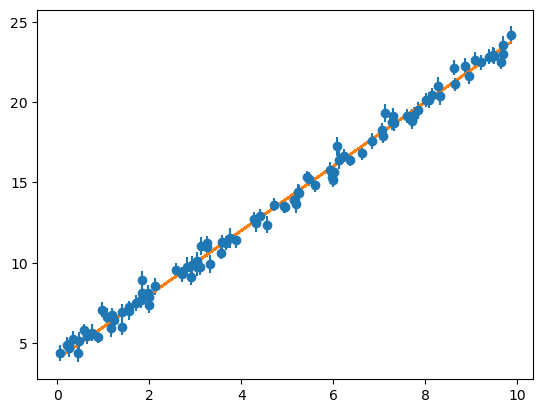

In [21]:
truths = [2.0, 4.0]
ndim = len(truths)
nepochs = 100
yerr = np.random.normal(0.5, 0.05, nepochs)

t, y = make_data(model, truths, nepochs, yerr)

plt.errorbar(t, y, yerr=yerr, fmt='o')
plt.plot(t, model(truths, t), label='truth')

In [22]:
from dynesty import NestedSampler

sampler = NestedSampler(log_probability, prior_transform, ndim, nlive=50, logl_args=(t, y, yerr), sample='rwalk')
sampler.run_nested(maxiter=50000, dlogz=0.001)
res = sampler.results

iter: 909 | +50 | bound: 90 | nc: 1 | ncall: 17832 | eff(%):  5.393 | loglstar:   -inf < -40.110 <    inf | logz: -51.215 +/-    nan | dlogz:  0.000 >  0.001                                         

In [23]:
res.summary()

Summary
nlive: 50
niter: 909
ncall: 17782
eff(%):  5.393
logz: -51.215 +/-  0.448


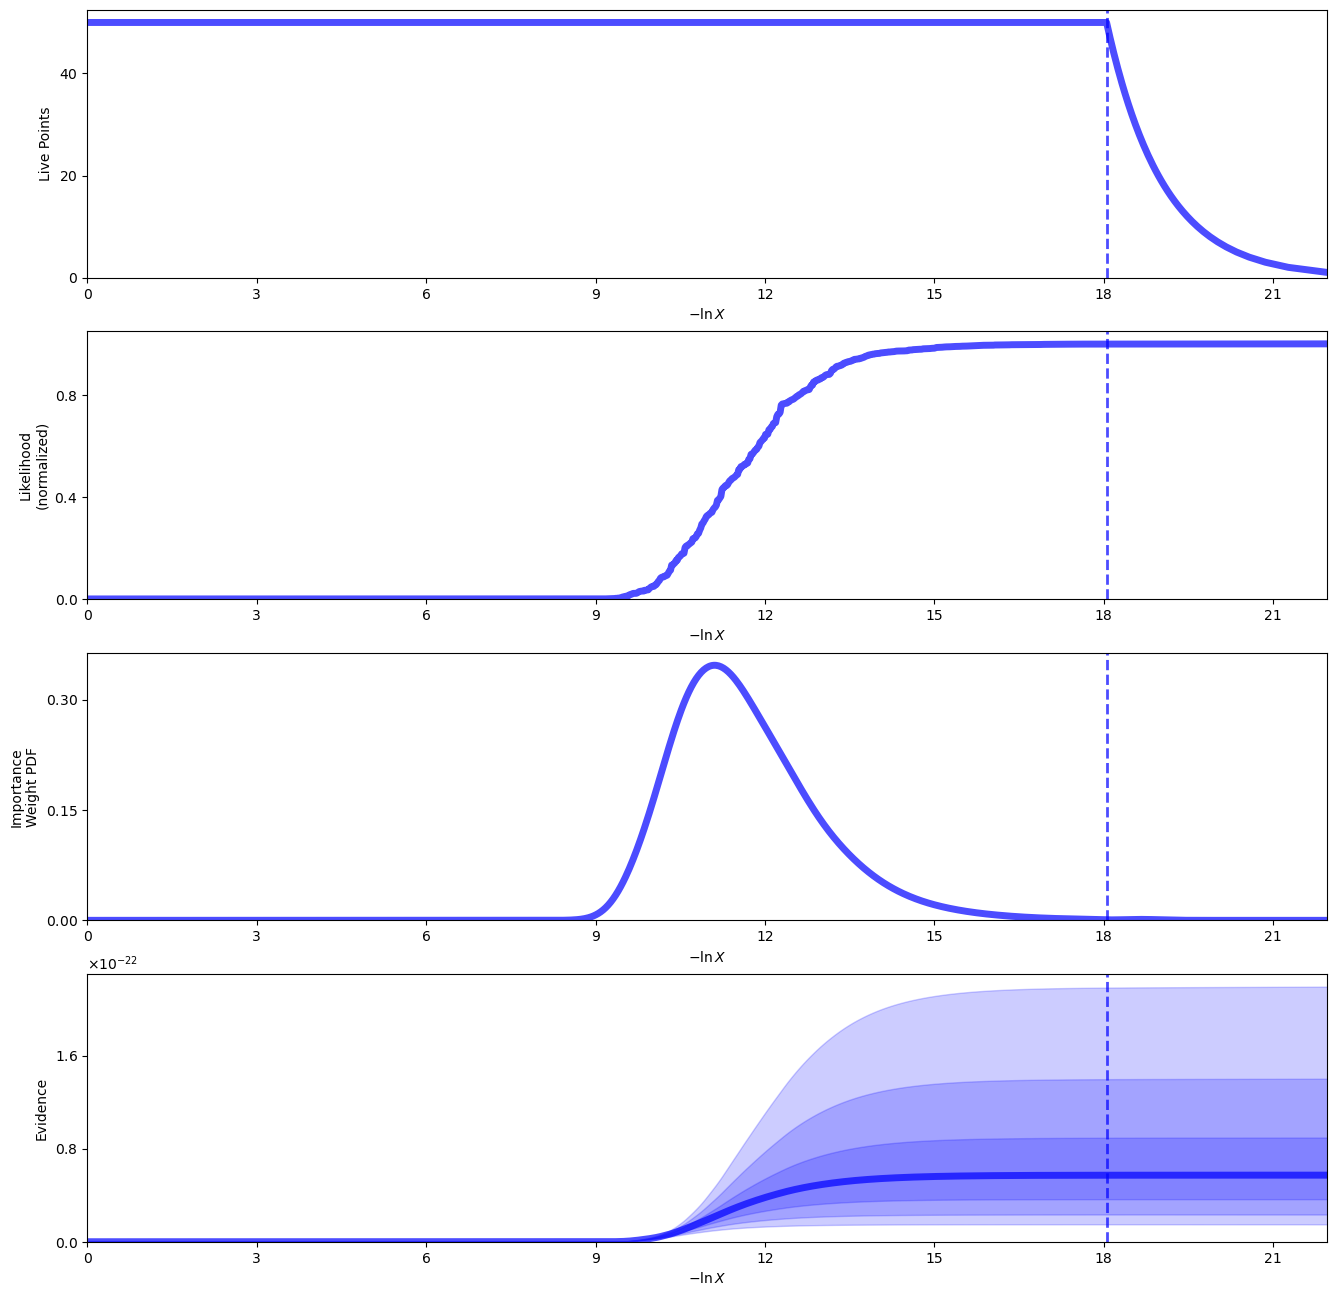

In [24]:
from dynesty import plotting as dyplot

fig, axes = dyplot.runplot(res)  # summary (run) plot

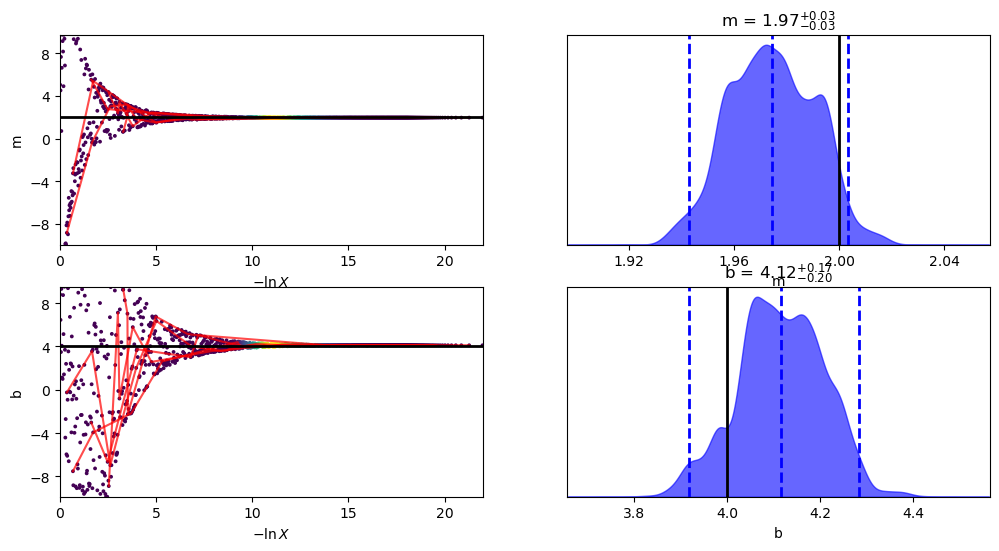

In [25]:
fig, axes = dyplot.traceplot(res, truths=np.array(truths),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True,
                             connect_highlight=range(5), labels=['m', 'b'])

iter: 1025 | +50 | bound: 105 | nc: 1 | ncall: 20384 | eff(%):  5.287 | loglstar:   -inf < -40.110 <    inf | logz: -51.215 +/-  0.447 | dlogz:  0.000 >  0.000                                       

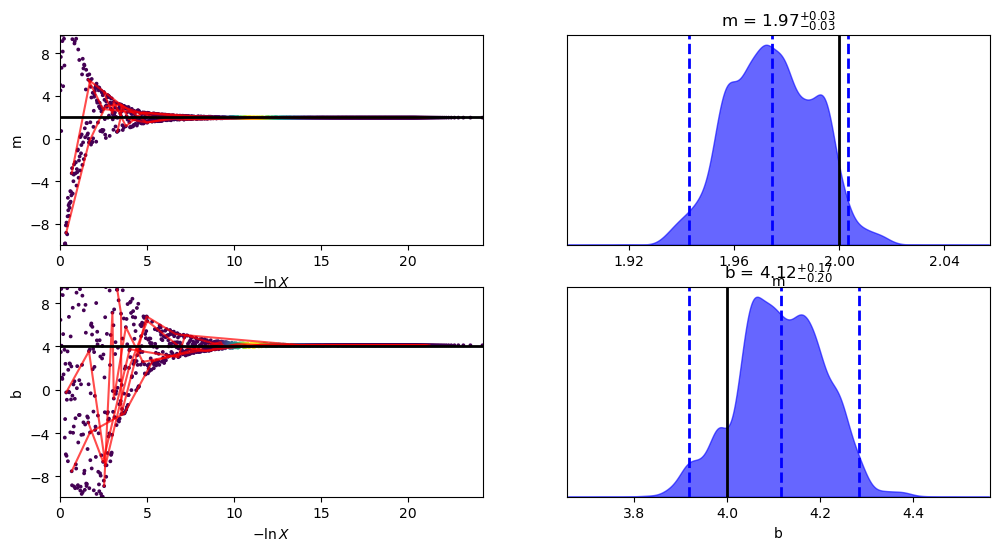

In [26]:
sampler.run_nested(dlogz=0.0001)
res2 = sampler.results
fig, axes = dyplot.traceplot(res2, truths=np.array(truths),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True,
                             connect_highlight=range(5), labels=['m', 'b'])

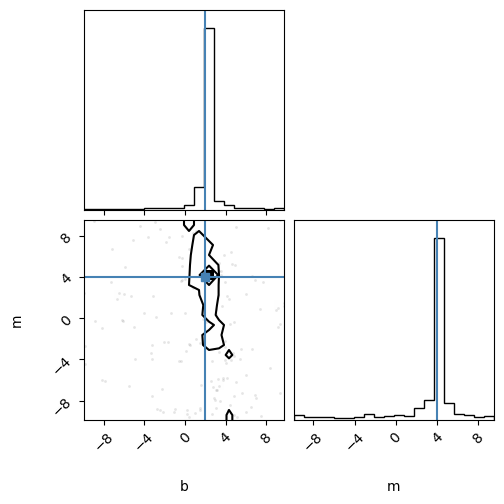

In [27]:
import corner

samples = res.samples

fig = corner.corner(samples, labels=['b', 'm'], truths=truths)

In [28]:
print(type(samples), samples.shape)

<class 'numpy.ndarray'> (959, 2)


## Reading the Lightcurve files

In [69]:
def load_data(file):
    r'''Load the lightcurve data file.

    Parameters:
    -----------
    file : str
        The path to the data file.

    Returns:
    --------
    tuple
        A tuple containing the following arrays:
        - t : numpy.ndarray
            Simulation time.
        - f : numpy.ndarray
            Measured relative flux.
        - ferr : numpy.ndarray
            Measured relative flux error.
        - tshift : numpy.ndarray
            Parallax shift in time.
        - ushift : numpy.ndarray
            Parallax shift in u-coordinate.

    Notes:
    ------
    The lightcurve columns are:
        [0] Simulation_time 
        [1] measured_relative_flux 
        [2] measured_relative_flux_error 
        [3] true_relative_flux
        [4] true_relative_flux_error 
        [5] observatory_code 
        [6] saturation_flag 
        [7] best_single_lens_fit 
        [8] parallax_shift_t
        [9] parallax_shift_u 
        [10] BJD 
        [11] source_x 
        [12] source_y 
        [13] lens1_x 
        [14] lens1_y 
        [15] lens2_x 
        [16] lens2_y

    Magnitudes can be computed using:
        $$m = m_{source} + 2.5 log f_s - 2.5 log{F}$$
    where $F=fs*\mu + (1-fs)$ is the relative flux (in the file), $\mu$ is the magnification, and
        $$\sigma_m = 2.5/ln{10} \sigma_F/F.$$

    These are listed in the header information in lines #fs and #Obssrcmag with order matching the observatory code order.
    The observatory codes correspond to 0=W146, 1=Z087, 2=K213

    Bugs/issues/caveats:
    The output file columns list a limb darkening parameter of Gamma=0, it is actually Gamma=0.36 (in all filters)
    The orbit for the Z087 observatory appears to be different to the W146 and K213 observatory
    Dev is working on producing the ephemerides, but for single observatory parallax, using interpolated versions of the ones
    available for the data challenge will probably be accurate enough, or an Earth ephemeris with the semimajor axis (but
    not period) increased by 0.01 AU
    Lenses with masses smaller than the isochrone grid limits (I believe 0.1 MSun, will have filler values for magnitudes
    and lens stellar properties).
    There may be some spurious detections in the list where the single lens fit failed. Please let dev know if you find any
    of these events so that they can improve the single lens fitter.'''

    header = ['Simulation_time', 
              'measured_relative_flux', 
              'measured_relative_flux_error', 
              'true_relative_flux', 
              'true_relative_flux_error', 
              'observatory_code', 
              'saturation_flag', 
              'best_single_lens_fit', 
              'parallax_shift_t', 
              'parallax_shift_u', 
              'BJD', 
              'source_x', 
              'source_y', 
              'lens1_x', 
              'lens1_y', 
              'lens2_x', 
              'lens2_y']
    df = pd.read_csv(file, sep=r'\s+', skiprows=12, names=header)
    t = np.array(df['BJD'])
    tshift = np.array(df['parallax_shift_t'])
    ushift = np.array(df['parallax_shift_u'])
    f = np.array(df['measured_relative_flux'])
    ferr = np.array(df['measured_relative_flux_error'])

    data = (t, f, ferr, tshift, ushift)

    return data



In [30]:
file = './repsample/OMPLLD_croin_cassan_2_0_312.det.lc'
header = ['Simulation_time', 
          'measured_relative_flux', 
          'measured_relative_flux_error', 
          'true_relative_flux', 
          'true_relative_flux_error', 
          'observatory_code', 
          'saturation_flag', 
          'best_single_lens_fit', 
          'parallax_shift_t', 
          'parallax_shift_u', 
          'BJD', 
          'source_x', 
          'source_y', 
          'lens1_x', 
          'lens1_y', 
          'lens2_x', 
          'lens2_y']

data = pd.read_csv(file, sep=r'\s+', skiprows=12, names=header)  # delim_whitespace=True is the same as sep=r'\s+', but older.
                                                                 # The 'r' in sep=r'\s+' means raw string, which is not necessary.
                                                                 # Otherwise you get annoying warnings.
print(data.head())


   Simulation_time  measured_relative_flux  measured_relative_flux_error  \
0       112.501847                1.005389                      0.004663   
1       112.512078                1.011788                      0.004663   
2       112.532538                1.007268                      0.004663   
3       112.542768                1.007092                      0.004663   
4       112.552998                1.014704                      0.004663   

   true_relative_flux  true_relative_flux_error  observatory_code  \
0            1.009685                  0.004663                 0   
1            1.009715                  0.004663                 0   
2            1.009776                  0.004663                 0   
3            1.009807                  0.004663                 0   
4            1.009838                  0.004663                 0   

   saturation_flag  best_single_lens_fit  parallax_shift_t  parallax_shift_u  \
0                0              1.009654        

In [31]:
data = load_data(file)
print(data)

(array([2458346.5018473, 2458346.5120775, 2458346.532538 , ...,
       2460058.0361619, 2460058.5476723, 2460059.0591827]), array([1.0053893 , 1.0117883 , 1.0072679 , ..., 0.98980624, 0.99929855,
       0.99628062]), array([0.00466259, 0.00466266, 0.0046628 , ..., 0.00570489, 0.00570489,
       0.00570489]), array([-9.71541e-04, -9.69683e-04, -9.65971e-04, ..., -1.02016e+00,
       -1.02011e+00, -1.02005e+00]), array([0.00032372, 0.00032309, 0.00032184, ..., 0.129166  , 0.129049  ,
       0.128932  ]))


## Get truths from master parameter file

In [32]:
def get_params(master_file, EventID, SubRun, Field):
    '''get the true params for the event'''
    EventID = int(EventID)
    SubRun = int(SubRun)
    Field = int(Field)

    master = pd.read_csv(master_file, header=0, delimiter=',')
    #print(master.head())

    truths = master[(master['EventID'] == int(EventID)) & 
                    (master['SubRun'] == int(SubRun)) & 
                    (master['Field'] == int(Field))
                    ].iloc[0]
    print(truths)

    s = truths['Planet_s']
    q = truths['Planet_q']
    rho = truths['rho']
    u0 = truths['u0lens1']
    alpha = truths['alpha']*np.pi/180
    t0 = truths['t0lens1']
    tE = truths['tE_ref']
    piEE = truths['piEE']
    piEN = truths['piEN']
    i = truths['Planet_inclination']*np.pi/180
    phase = truths['Planet_orbphase']*np.pi/180
    period = truths['Planet_period']
    truths['params'] = [s, q, rho, u0, alpha, t0, tE, piEE, piEN, i, phase, period]
    
    return truths

In [33]:
master_file = 'repsample/OMPLLD_croin_cassan_0.sample.csv'
EventID = '148'
SubRun = '10'
Field = '0'

truths = get_params(master_file, EventID, SubRun, Field)
print(truths['lcname'])

EventID                                                        148
SubRun                                                          10
Field                                                            0
galactic_l                                                 0.96727
galactic_b                                               -1.530864
                                              ...                 
ObsGroup_2_flatchi2                                  152145.092376
ObsGroup_2_FiniteSourceflag                                      0
ObsGroup_2_chi2                                         314.798797
LCOutput                                                         1
lcname                         OMPLLD_croin_cassan_0_10_148.det.lc
Name: 0, Length: 195, dtype: object
OMPLLD_croin_cassan_0_10_148.det.lc


In [34]:
truths

EventID                                                                      148
SubRun                                                                        10
Field                                                                          0
galactic_l                                                               0.96727
galactic_b                                                             -1.530864
                                                     ...                        
ObsGroup_2_FiniteSourceflag                                                    0
ObsGroup_2_chi2                                                       314.798797
LCOutput                                                                       1
lcname                                       OMPLLD_croin_cassan_0_10_148.det.lc
params                         [0.658155766857, 0.0001056079023685, 0.0013784...
Name: 0, Length: 196, dtype: object

## Single Event evaluation tests

In [35]:
import gulls_bug_post as post
# might need to pip install VBBinaryLensing

In [36]:
path = './sample-241113/'
ndim = 12

orbit = post.Orbit()

if not os.path.exists(path + 'posteriors/'):  # make a directory for the posteriors
    os.mkdir(path + 'posteriors/')

ds = post.Data()
event_name, truths, data = ds.new_event(path)

Already ran: ['OMPLDG_croin_cassan_0_1003_53.det.lc'
 'OMPLDG_croin_cassan_0_1000_1079.det.lc'
 'OMPLDG_croin_cassan_0_1000_1344.det.lc'
 'OMPLDG_croin_cassan_0_1000_1365.det.lc'
 'OMPLDG_croin_cassan_0_1000_1445.det.lc'
 'OMPLDG_croin_cassan_0_1000_1551.det.lc'
 'OMPLDG_croin_cassan_0_1000_2032.det.lc'
 'OMPLDG_croin_cassan_0_1000_2443.det.lc'
 'OMPLDG_croin_cassan_0_1000_2943.det.lc'
 'OMPLDG_croin_cassan_0_1000_3163.det.lc'
 'OMPLDG_croin_cassan_0_1000_3254.det.lc'
 'OMPLDG_croin_cassan_0_1000_506.det.lc'
 'OMPLDG_croin_cassan_0_1000_796.det.lc'
 'OMPLDG_croin_cassan_0_1002_1490.det.lc'
 'OMPLDG_croin_cassan_0_1002_1668.det.lc'
 'OMPLDG_croin_cassan_0_1002_1845.det.lc'
 'OMPLDG_croin_cassan_0_1002_2494.det.lc'
 'OMPLDG_croin_cassan_0_1002_3276.det.lc'
 'OMPLDG_croin_cassan_0_1002_785.det.lc'
 'OMPLDG_croin_cassan_0_1003_1210.det.lc'
 'OMPLDG_croin_cassan_0_1003_155.det.lc'
 'OMPLDG_croin_cassan_0_1003_1588.det.lc'
 'OMPLDG_croin_cassan_0_1003_2230.det.lc'
 'OMPLDG_croin_cassan_0_100

In [37]:
data.keys()

dict_keys([np.int64(0), np.int64(1), np.int64(2)])

In [38]:
data[np.int64(0)][:,0]

array([ 2.4583465e+06,  9.8957451e-01,  1.4922000e-02,  1.2344200e+00,
       -1.8493100e-02])

(40540,) (40540,) (40540, 2)
(844,) (844,) (844, 2)
(844,) (844,) (844, 2)
[-0.0184931 -0.0184865 -0.0184732 ...  0.0312895  0.0313009  0.0313123] [[-0.0184931 -0.0184865 -0.0184732 ...  0.0312895  0.0313009  0.0313123]
 [ 1.23442    1.23439    1.23434   ... -0.065209  -0.0652337 -0.0652584]] (2, 40540) (2, 40540)
[-1.83144e-02 -1.79877e-02 -1.76666e-02 -1.73510e-02 -1.70409e-02
 -1.67365e-02 -1.64376e-02 -1.61445e-02 -1.58569e-02 -1.55751e-02
 -1.52989e-02 -1.50285e-02 -1.47638e-02 -1.45049e-02 -1.42518e-02
 -1.40044e-02 -1.37629e-02 -1.35272e-02 -1.32973e-02 -1.30733e-02
 -1.28552e-02 -1.26430e-02 -1.24367e-02 -1.22363e-02 -1.20419e-02
 -1.18534e-02 -1.16709e-02 -1.14944e-02 -1.13239e-02 -1.11594e-02
 -1.10009e-02 -1.08484e-02 -1.07021e-02 -1.05617e-02 -1.04275e-02
 -1.02993e-02 -1.01772e-02 -1.00613e-02 -9.95140e-03 -9.84766e-03
 -9.75005e-03 -9.65858e-03 -9.57325e-03 -9.49408e-03 -9.42107e-03
 -9.35423e-03 -9.29356e-03 -9.23907e-03 -9.19076e-03 -9.14864e-03
 -9.11272e-03 -9.08299e-

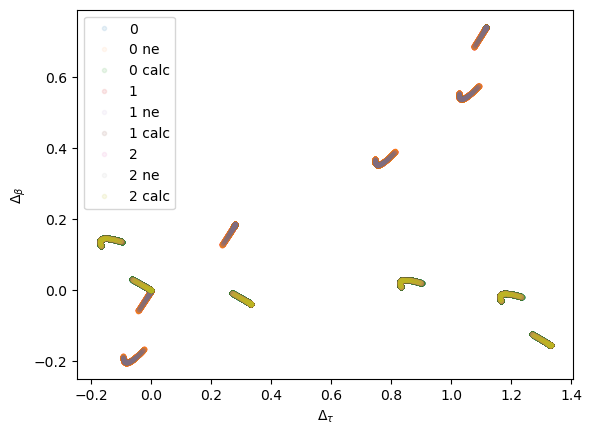

In [39]:
piE = np.array([truths['piEN'], truths['piEE']])

tu_data = {}
epochs = {}
t_data = {}

for obs in data.keys():
    tu_data[obs] = data[obs][3:5,:].T
    epochs[obs] = data[obs][0,:]

parallax = post.Parallax(truths['ra_deg'], 
                         truths['dec_deg'], 
                         orbit, 
                         truths['tcroin'], 
                         tu_data, 
                         piE, 
                         epochs
                         )
parallax.update_piE_NE(truths['piEN'], truths['piEE'])
Db_DT = parallax.parallax_shift(epochs)  # Delta beta, Delta tau

plt.close(5)
plt.figure(5)

for obs in data.keys():
    plt.plot(data[obs][3,:], 
             data[obs][4,:], 
             '.', 
             label=obs, 
             alpha=0.1)
    
    #plt.plot(Delta_tau, Delta_beta, '.', label='calc', alpha=0.05)
    #plt.plot(Delta_tau_lc, Delta_beta_lc, '.', label='lc', alpha=0.05)
    
    n, e = parallax.ne[obs].T *np.linalg.norm(parallax.piE)
    plt.plot(n, e, '.', 
             label=str(obs) + ' ne', 
             alpha=0.05)
    
    '''n, e = parallax.ne[obs].T
    plt.plot(n, e, '.', 
             label=str(obs) + ' ne unscaled', 
             alpha=0.05)'''

    #print('piE', np.linalg.norm(parallax.piE))
    #print('n rescaled', n, type(n), n.shape)
    #print('n raw', parallax.ne[0], type(parallax.ne[0]), parallax.ne[0].shape)

    #for i in range(n.shape[0]):
    #    if e[i] < -0.15 and e[i] > -0.25:
    #        print(r'%.4f, %.4f, %.4f, %.4f' %(n[i], e[i], parallax.ne[0,i], parallax.ne[1,i]))

    #plt.plot(n, e, '.', label='ne', alpha=0.05)
    
    print(Db_DT[obs][0], Db_DT[obs], Db_DT[obs].shape, Db_DT[obs].shape)
    plt.plot(Db_DT[obs][1], 
             Db_DT[obs][0], 
             '.', 
             label=str(obs) + ' calc', 
             alpha=0.1)

    #plt.plot(parallax.ne[1,i], parallax.ne[0,i], '.', label='ne', alpha=0.05)
    #parallax.ne[1,i]
plt.xlabel(r'$\Delta_\tau$')
plt.ylabel(r'$\Delta_\beta$')
plt.legend()
plt.show()

In [40]:
event = post.Event(parallax, orbit, data, truths, ds.sim_time0, truths['tcroin'])
print()
print("truths['params'], event.true_params, truths['params_t0_L1'], truths['params_t0_COM']")
for i in range(12):
    print(truths['params'][i], event.true_params[i], truths['params_t0_L1'][i], truths['params_t0_COM'][i])


debug Event.tref2t0: delta_x0_com:  3.663733910736936e-05

debug Event.tref2t0: phase0_t0_L1:  4.651930287303999

debug Event.tref2t0: t0_com:  2460006.431550421
debug Event.tref2t0: u0_com:  -0.046678647401510134

debug Event.tref2t0: rot_ref:  -1.737483150240681
debug Event.tref2t0: rot_t0_L1:  -1.7376845367700304
debug Event.tref2t0: rot_t0_com:  -1.7377188369103669
debug Event.tref2t0: rot_t0_com:  -0.00023568666968598606
debug Event.tref2t0: rot:  -0.00020138652934953427

debug Event.tref2t0: alpha_gulls:  4.647761051525557
debug Event.tref2t0: alpha_t0_com:  3.0916908676001476
debug Event.tref2t0: truths[params_t0_L1]:  [np.float64(0.868995754108), np.float64(4.216232777855e-05), np.float64(0.0008891794305623), np.float64(-0.03791306906624), np.float64(4.647761051525557), np.float64(2460006.4601600794), np.float64(50.43204995932), np.float64(0.1573992662693), np.float64(-0.0800028569367), np.float64(1.2032368444230497), np.float64(4.651930287303999), np.float64(14233.97328068838

In [41]:
event_t0 = post.Event(parallax, orbit, data, truths, ds.sim_time0, truths['t0lens1'])
event_tc = post.Event(parallax, orbit, data, truths, ds.sim_time0, truths['tcroin'])



debug Event.tref2t0: delta_x0_com:  3.663733910736936e-05

debug Event.tref2t0: phase0_t0_L1:  4.652004433002626

debug Event.tref2t0: t0_com:  2460006.431550421
debug Event.tref2t0: u0_com:  -0.046678647401510134

debug Event.tref2t0: rot_ref:  -1.737483150240681
debug Event.tref2t0: rot_t0_L1:  -1.737483150240681
debug Event.tref2t0: rot_t0_com:  -1.7375174523993773
debug Event.tref2t0: rot_t0_com:  -3.430215869637543e-05
debug Event.tref2t0: rot:  0.0

debug Event.tref2t0: alpha_gulls:  4.647761051525557
debug Event.tref2t0: alpha_t0_com:  3.091892252111137
debug Event.tref2t0: truths[params_t0_L1]:  [np.float64(0.868995754108), np.float64(4.216232777855e-05), np.float64(0.0008891794305623), np.float64(-0.03791306906624), np.float64(4.647761051525557), np.float64(2460006.4601600794), np.float64(50.43204995932), np.float64(0.1573992662693), np.float64(-0.0800028569367), np.float64(1.2032368444230497), np.float64(4.652004433002626), np.float64(14233.973280688388)]
debug Event.tref2t0

In [42]:
fit = post.Fit()

chi2_ew_t0, chi2_t0 = fit.get_chi2(event_t0, truths['params'])
chi2_ew_tc, chi2_tc = fit.get_chi2(event_tc, truths['params'])

debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(40540,) (40540,) (40540, 2)
debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(844,) (844,) (844, 2)
debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(844,) (844,) (844, 2)
debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(40540,) (40540,) (40540, 2)
debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(844,) (844,) (844, 2)
debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(844,) (844,) (844, 2)


In [43]:
#import pickle
#with open('test.txt', 'wb') as f:
#    pickle.dump(chi2_ew_t0, f)


In [44]:
print('t_ref = t0:', chi2_t0)
print('t_ref = tc:', chi2_tc)

#np.savetxt('test2.txt', np.array([chi2]))

t_ref = t0: 721538016.2348889
t_ref = tc: 721537997.8285584


## VBBL

In [45]:
from VBBinaryLensing import VBBinaryLensing

vbbl = VBBinaryLensing()
vbbl.a1 = 0.36
A = vbbl.BinaryMagDark(1, 1, 0.5, 0.5, 0.001, 1.0e-3)

## Checking the lightcurve matches the model

In [46]:
A = {}
fs = {}
fb = {}
chi2 = {}
chi2sum = {}

events = {'t0':event_t0, 'tc':event_tc}

for t_ref in events.keys():
    event = events[t_ref]
    chi2sum[t_ref] = 0
    for obs in event.data.keys():  # looping through observatories
        key = str(obs)+'_'+t_ref
        t = event.data[obs][0]  # BJD
        f = event.data[obs][1]  # obs_rel_flux
        f_err = event.data[obs][2]  # obs_rel_flux_err

        A[key] = event.get_magnification(t, obs)
        fs[key], fb[key] = fit.get_fluxes(A[key], f, f_err**2)

        chi2[key] = ((f - A[key]*fs[key]+fb[key]) / f_err) ** 2

        chi2sum[t_ref] += np.sum(chi2[key])

        print(obs, t_ref, chi2sum[t_ref], chi2[key].sum())

debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(40540,) (40540,) (40540, 2)
0 t0 554855569.0260751 554855569.0260751
debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(844,) (844,) (844, 2)
1 t0 554857127.4235685 1558.3974934108762
debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(844,) (844,) (844, 2)
2 t0 721538016.2348853 166680888.81131685
debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(40540,) (40540,) (40540, 2)
0 tc 554855569.9216233 554855569.9216233
debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(844,) (844,) (844, 2)
1 tc 554857128.3186295 1558.3970062114054
debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(844,) (844,) (844, 2)
2 tc 721537997.8285584 166680869.509929


debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(40540,) (40540,) (40540, 2)
debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(844,) (844,) (844, 2)
debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(844,) (844,) (844, 2)
debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(10000,) (844,) (844, 2)
debug Event.get_magnification: a/rE: 2.3891537240397924 2.389153724039655
(10000,) (844,) (844, 2)


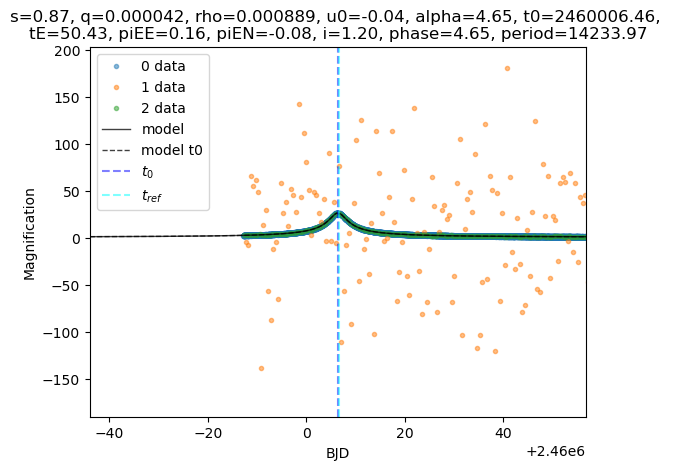

In [47]:
A_ = {}  # t is data epochs
A_lin = 0  # linearly spaced time
n = 10000
fb_ = {}
t0 = event.true_params[5]
tE = event.true_params[6]
tt = np.linspace(t0-5.0*tE, t0+5.0*tE, n)
fs_ = {}

plt.close(6)
plt.figure(6)

rho = event.true_params[2]  # doesn't matter which event object

for obs in event.data.keys():

    # data
    t = event.data[obs][0]  # BJD
    f = event.data[obs][1]  # obs_rel_flux
    f_err = event.data[obs][2]  # obs_rel_flux_err

    # calculating the model
    A_[obs] = event_tc.get_magnification(t, obs)  # event tc matches gulls
    fs_[obs], fb_[obs] = fit.get_fluxes(A_[obs], f, f_err**2)

    # plotting the data
    plt.plot(t, (f-fb_[obs])/fs_[obs], '.', label=str(obs)+' data', alpha=0.5, zorder=0)
    
# plotting the model
A_lin = event_tc.get_magnification(tt, obs)
plt.plot(tt, A_lin, 
         '-', label='model', zorder=1, 
         color='black', alpha=0.75, lw=1
         )

A_lin = event_t0.get_magnification(tt, obs)
plt.plot(tt, A_lin, 
         '--', label='model t0', zorder=1, 
         color='black', alpha=0.75, lw=1
         )

# plot a vertical line at time t0 and tcroin (tref)
plt.axvline(x=t0, color='b', linestyle='--', label=r'$t_0$', alpha=0.5)
plt.axvline(x=event.t_ref, color='cyan', linestyle='--', label=r'$t_{ref}$', alpha=0.5)


plt.xlabel('BJD')
xmin = np.min([t0-1.0*tE, event.t_ref-2.0])
xmax = np.max([t0+1.0*tE, event.t_ref+2.0])
plt.xlim(xmin, xmax)
plt.ylabel('Magnification')
plt.title('s=%.2f, q=%.6f, rho=%.6f, u0=%.2f, alpha=%.2f, t0=%.2f, \ntE=%.2f, piEE=%.2f, piEN=%.2f, i=%.2f, phase=%.2f, period=%.2f' %tuple(event.true_params))
plt.legend()
plt.show()

In [48]:
i = event.true_params[9]
phase = event.true_params[10]
period = event.true_params[11]
t_s = event.sim_time0
t0 = event.true_params[5]
t_ref = event_tc.t_ref
s = event.true_params[0]
a = 1.5320
rE = truths['rE']

print('a, s, rE, a/rE:', a, s, rE, a/rE)
print()

for t in [t_s, t0, t_ref, -t0, -t_s, -t_ref, t_ref-t_s, t0-t_s, t0-t_ref, t_s-t0, t_s-t_ref, t_ref-t0]:
    s0, _, _ = event.projected_seperation(i, period, t, phase_offset=phase, a=a/rE, t_start=t0)
    print('t, phase:',t, phase)
    print('s=', s0)

print()
s0, _, _ = event.projected_seperation(i, period, t0, phase_offset=phase, a=1, t_start=t0)
print(s/s0)


a, s, rE, a/rE: 1.532 0.868995754108 3.342759812125 0.45830394228238136

t, phase: 2458233.9999999623 4.652004433002626
s= 0.35924455746405676
t, phase: 2460006.4601600794 4.652004433002626
s= 0.16669675790511707
t, phase: 2460006.6281302795 4.652004433002626
s= 0.16669185974910394
t, phase: -2460006.4601600794 4.652004433002626
s= 0.40003375656067836
t, phase: -2458233.9999999623 4.652004433002626
s= 0.19313388420901992
t, phase: -2460006.6281302795 4.652004433002626
s= 0.4000488673902951
t, phase: 1772.6281303172 4.652004433002626
s= 0.4466949390604447
t, phase: 1772.4601601171307 4.652004433002626
s= 0.44670200254359743
t, phase: -0.16797020006924868 4.652004433002626
s= 0.40199886794749684
t, phase: -1772.4601601171307 4.652004433002626
s= 0.19528726206106078
t, phase: -1772.6281303172 4.652004433002626
s= 0.19527074178456305
t, phase: 0.16797020006924868 4.652004433002626
s= 0.40202863743424766

2.389153724039655


In [49]:
s = event.true_params[0]
q = event.true_params[1]
s1 = q/(1.0+q) * s
print(s1)

3.663733910736936e-05


## Making a caustic plot

In [50]:
# plot lenses
s = event.true_params[0]
q = event.true_params[1]
t0 = event.true_params[5]
tE = event.true_params[6]
print('s, q', s, q)

s, q 0.868995754108 4.216232777855e-05


In [51]:
n = 501
u1 = np.linspace(-2, 2, n)
u2 = np.linspace(-2, 2, n)
Amap = np.zeros([n, n])
rho = event.true_params[2]

# pool this before you run it again

'''
for i in range(n):
    for j in range(n):
        Amap[j,i] = vbbl.BinaryMagDark(s, q, u1[i], u2[j],  rho, 1.0e-5)
        #'''

'\nfor i in range(n):\n    for j in range(n):\n        Amap[j,i] = vbbl.BinaryMagDark(s, q, u1[i], u2[j],  rho, 1.0e-5)\n        #'

In [52]:
tc = truths['tcroin']
s = event.true_params[0]
a = truths['Planet_semimajoraxis']/truths['rE']
phase0 = event.true_params[10]

def iterate_from(item):
    while item is not None:
        yield item
        item = item.next

s_t0, _, _ = event.projected_seperation(i, period, t0, phase_offset=phase0, t_start=t0, a = a)
s_tc, _, _ = event.projected_seperation(i, period, tc, phase_offset=phase0, t_start=t0, a = a)
print(type(s_tc), type(s_t0), s_tc, s_t0)

s_t0, _, _ = event.projected_seperation(i, period, t0, phase_offset=phase0, t_start=t0)
s_tc, _, _ = event.projected_seperation(i, period, tc, phase_offset=phase0, t_start=t0)

print(type(s_tc), type(s_t0), s_tc, s_t0)
s_tc = s * s_tc / s_t0
print(s_tc, s)

solutions_t0 = vbbl.PlotCrit(s, q) # Returns _sols object containing n crit. curves followed by n caustic curves
solutions_tc = vbbl.PlotCrit(s_tc, q)

curves_t0 = []
curves_tc = []
for curve in iterate_from(solutions_t0.first):
    for point in iterate_from(curve.first):
        curves_t0.append((point.x1, point.x2))
for curve in iterate_from(solutions_tc.first):
    for point in iterate_from(curve.first):
        curves_tc.append((point.x1, point.x2))
        
critical_curves_t0 = np.array(curves_t0[:int(len(curves_t0)/2)])
caustic_curves_t0 = np.array(curves_t0[int(len(curves_t0)/2):])
critical_curves_tc = np.array(curves_tc[:int(len(curves_tc)/2)])
caustic_curves_tc = np.array(curves_tc[int(len(curves_tc)/2):])

<class 'numpy.float64'> <class 'numpy.float64'> 0.868970219857523 0.8689957541080497
<class 'numpy.float64'> <class 'numpy.float64'> 0.36371465390188085 0.36372534147307817
0.868970219857473 0.868995754108


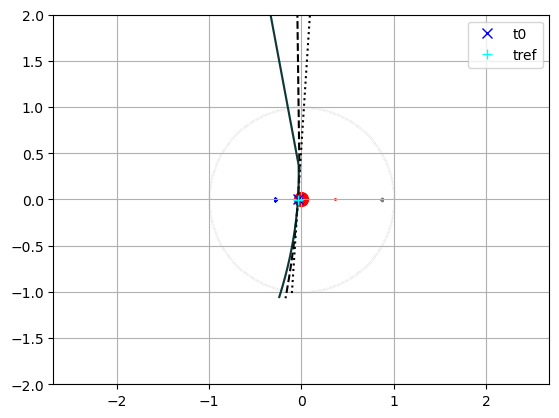

In [53]:
plt.close(7)
plt.figure(7)

plt.plot(event.lens1_0[0], 
         event.lens1_0[1], 
         'o', ms=10, color='red', zorder=0
         )
plt.plot(event.lens2_0[0], 
         event.lens2_0[1], 
         'o', ms=10**q, color='red', zorder=0
         )

t = event.data[0][0]  # BJD
points = np.where(np.logical_and(t > (t0-5.0*tE), t < (t0+5.0*tE)))

# plot trajectory
plt.plot(event.traj_base_u1[0][points], 
         event.traj_base_u2[0][points], 
         ':', color='black'
         )
plt.plot(event.traj_parallax_u1[0][points], 
         event.traj_parallax_u2[0][points], 
         '--', color='black'
         )
plt.plot(event_t0.traj_parallax_dalpha_u1[0][points], 
         event_t0.traj_parallax_dalpha_u2[0][points], 
         '-', color='cyan', alpha=0.5
         )
plt.plot(event_tc.traj_parallax_dalpha_u1[0][points],
        event_tc.traj_parallax_dalpha_u2[0][points],
        '-', color='black', alpha=0.8
        )
         
'''
plt.contour(u1, u2, np.log10(Amap), 
            levels=50, 
            linewidths=0.5, 
            colors='black', 
            zorder=0
            )#'''

plt.plot(caustic_curves_t0[:,0], 
         caustic_curves_t0[:,1], 
         '.', color='blue', ms=0.2, 
         zorder=1
         )

plt.plot(critical_curves_t0[:,0], 
         critical_curves_t0[:,1], 
         '.', color='grey', ms=0.2, alpha=0.5, 
         zorder=1
         )

plt.plot(caustic_curves_tc[:,0], 
         caustic_curves_tc[:,1], 
         '.', color='cyan', ms=0.2, 
         zorder=0, alpha = 0.5
         )

u0 = event.true_params[3]
alpha = event.true_params[4]
tE = event.true_params[6]
xcom = truths['xCoM']
x0 = -u0 * np.sin(alpha) - xcom
y0 = u0 * np.cos(alpha)
x0_ref = -u0 * np.sin(alpha) + (event.t_ref-t0)/tE * np.cos(alpha) - xcom
y0_ref = u0 * np.cos(alpha) + (event.t_ref-t0)/tE * np.sin(alpha)
plt.plot(x0, y0, 'x', ms=7, color='blue', label='t0')
plt.plot(x0_ref, y0_ref, '+', ms=7, color='cyan', label='tref')

plt.grid()
plt.axis('equal')
plt.xlim(-2.0, 2.0)
plt.ylim(-2.0, 2.0)
plt.legend()

plt.show()


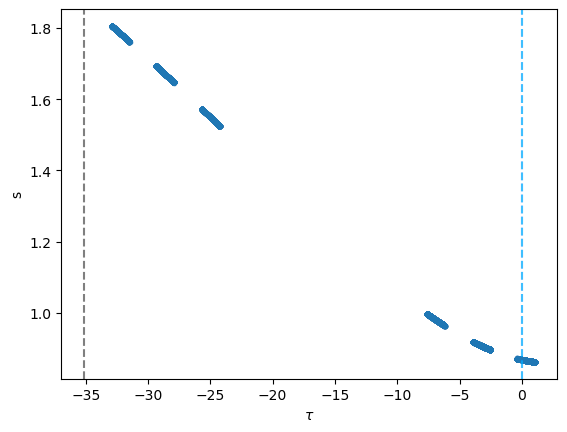

In [54]:
plt.close(8)
plt.figure(8)

plt.plot(event.tau[0], event.ss[0], '.', label='ss', alpha=0.1)

plt.xlabel(r'$\tau$')
plt.ylabel('s')

# plot a vertical line at time t0 and tcroin (tref)
plt.axvline(x=0, color='b', linestyle='--', label=r'$t_0$', alpha=0.5)
plt.axvline(x=(event.t_ref-t0)/tE, color='cyan', linestyle='--', label=r'$t_{ref}$', alpha=0.5)
plt.axvline(x=(event.sim_time0-t0)/tE, color='k', linestyle='--', label=r'$t_{sim0}$', alpha=0.5)


plt.show()

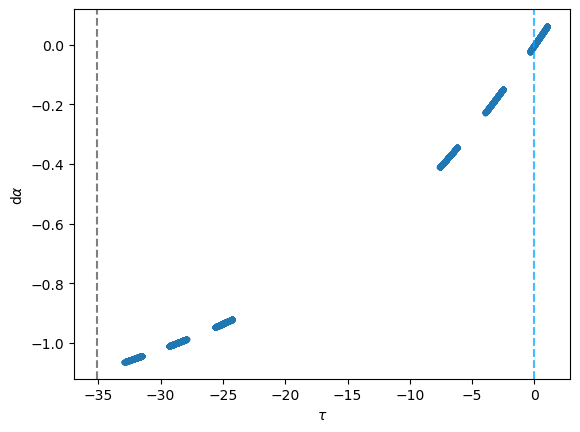

In [55]:
plt.close(9)
plt.figure(9)

plt.plot(event.tau[0], event.dalpha[0], '.', alpha=0.1)

plt.xlabel(r'$\tau$')
plt.ylabel(r'd$\alpha$')

# plot a vertical line at time t0 and tcroin (tref)
plt.axvline(x=0, color='b', linestyle='--', label=r'$t_0$', alpha=0.5)
plt.axvline(x=(event.t_ref-t0)/tE, color='cyan', linestyle='--', label=r'$t_{ref}$', alpha=0.5)
plt.axvline(x=(event.sim_time0-t0)/tE, color='k', linestyle='--', label=r'$t_{sim0}$', alpha=0.5)

plt.show()

## Adding to the run list

In [56]:
runlist = np.array([])
runlist = np.hstack([runlist, 'string'])

In [57]:
print(runlist)

['string']


In [58]:
np.savetxt('runlist.txt', runlist, fmt='%s')

In [59]:
runlist = np.loadtxt('runlist.txt', dtype=str)

In [60]:
runlist

array('string', dtype='<U6')

In [61]:
runlist = np.hstack([runlist, 'string2'])

In [62]:
runlist

array(['string', 'string2'], dtype='<U7')

In [63]:
np.savetxt('runlist.txt', runlist, fmt='%s')

In [64]:
np.loadtxt('runlist.txt', dtype=str)

array(['string', 'string2'], dtype='<U7')

## Reference Frame Conversions

In [65]:
import numpy as np

angle = 30
test_angles = np.array([angle, angle+90, angle+180, angle+270])
test_angles = np.deg2rad(test_angles)

print('angle, cos, sin, tan')
for phi in test_angles:
    print('%1.0f, %1.2f, %1.2f, %1.2f' % (phi*180/np.pi, np.cos(phi), np.sin(phi), np.tan(phi)))

print(-1.0/np.tan(test_angles))

angle, cos, sin, tan
30, 0.87, 0.50, 0.58
120, -0.50, 0.87, -1.73
210, -0.87, -0.50, 0.58
300, 0.50, -0.87, -1.73
[-1.73205081  0.57735027 -1.73205081  0.57735027]


In [66]:
1/1.73


0.5780346820809249

## BJD to Simulation Time

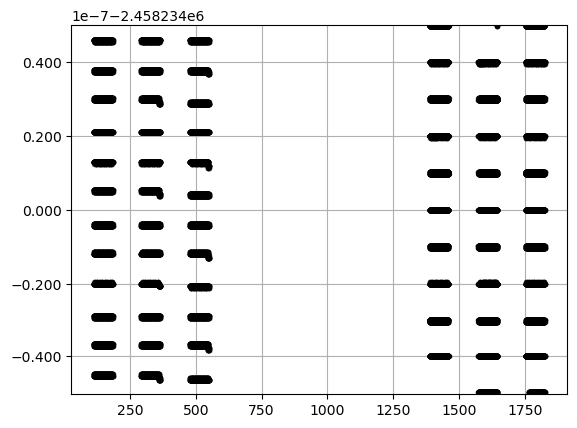

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

file = './sample-241113/OMPLDG_croin_cassan_0_1_2520.det.lc'
header = ['Simulation_time', 
          'measured_relative_flux', 
          'measured_relative_flux_error', 
          'true_relative_flux', 
          'true_relative_flux_error', 
          'observatory_code', 
          'saturation_flag', 
          'best_single_lens_fit', 
          'parallax_shift_t', 
          'parallax_shift_u', 
          'BJD', 
          'source_x', 
          'source_y', 
          'lens1_x', 
          'lens1_y', 
          'lens2_x', 
          'lens2_y',
          'A',
          'B',
          'C']

data = pd.read_csv(file, sep=r'\s+', skiprows=12, names=header)  # delim_whitespace=True is the same as sep=r'\s+', but older.
                                                                 # The 'r' in sep=r'\s+' means raw string, which is necessary.
                                                                 # Otherwise you get annoying warnings.

offset = data['Simulation_time'] - data['BJD']


plt.figure()

plt.plot(data['Simulation_time'], offset, '.', label='Simulation_time-BJD', color='black', alpha=0.5)

plt.ylim(np.min(offset), np.max(offset))
plt.grid()

plt.show()

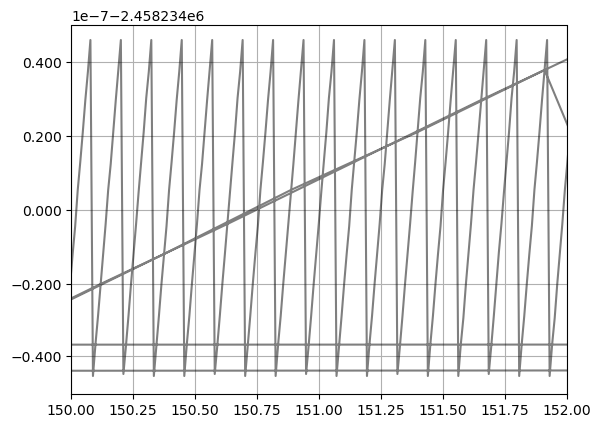

In [120]:
plt.figure()

plt.plot(data['Simulation_time'], offset, '-', label='Simulation_time-BJD', color='black', alpha=0.5)

plt.ylim(np.min(offset), np.max(offset))
plt.xlim(150, 152)
plt.grid()

plt.show()

In [121]:
sim_time0 = np.sum(data['BJD'] - data['Simulation_time'])/len(data['BJD'])
print(sim_time0)

2458234.0


In [122]:
data['BJD'][0] - data['Simulation_time'][0]

np.float64(2458233.9999999623)

In [123]:
data.head()

Simulation_time  measured_relative_flux  measured_relative_flux_error  \
0       112.501847                1.002970                      0.002093   
1       112.512078                0.999766                      0.002093   
2       112.532538                0.998546                      0.002093   
3       112.542768                0.998965                      0.002093   
4       112.552998                1.002809                      0.002093   

   true_relative_flux  true_relative_flux_error  observatory_code  \
0                 1.0                  0.002093                 0   
1                 1.0                  0.002093                 0   
2                 1.0                  0.002093                 0   
3                 1.0                  0.002093                 0   
4                 1.0                  0.002093                 0   

   saturation_flag  best_single_lens_fit  parallax_shift_t  parallax_shift_u  \
0                0              1.004153          0.284318          0.704810   
1                0              1.004153          0.284316          0.704814   
2                0              1.004153          0.284312          0.704821   
3                0              1.004153          0.284311          0.704825   
4                0              1.004153          0.284309          0.704828   

            BJD  source_x  source_y   lens1_x   lens1_y  lens2_x  lens2_y  \
0  2.458347e+06  -506.196   45.9903 -0.000013  0.000026  1.17117 -2.45591   
1  2.458347e+06  -506.193   45.9901 -0.000013  0.000026  1.17125 -2.45589   
2  2.458347e+06  -506.187   45.9895 -0.000013  0.000026  1.17140 -2.45586   
3  2.458347e+06  -506.183   45.9892 -0.000013  0.000026  1.17147 -2.45585   
4  2.458347e+06  -506.180   45.9890 -0.000013  0.000026  1.17155 -2.45583   

         A        B         C  
0  2.45005 -1.84683 -0.014016  
1  2.45036 -1.84640 -0.014014  
2  2.45099 -1.84555 -0.014010  
3  2.45130 -1.84512 -0.014008  
4  2.45161 -1.84469 -0.014006

In [126]:
data = pd.read_csv(file, sep=r'\s+', skiprows=12, names=header)

data_dict = {}
for code in data['observatory_code'].unique():
    data_obs = data[data['observatory_code'] == code][['BJD', 
                                    'measured_relative_flux', 
                                    'measured_relative_flux_error', 
                                    'parallax_shift_t', 
                                    'parallax_shift_u',
                                    'true_relative_flux', 
                                    'true_relative_flux_error',
                                    'Simulation_time'
                                    ]].reset_index(drop=True)
    data_dict[code] = data_obs.to_numpy().T

print(data_dict)

{np.int64(0): array([[2.45834650e+06, 2.45834651e+06, 2.45834653e+06, ...,
        2.46005922e+06, 2.46005923e+06, 2.46005924e+06],
       [1.00297030e+00, 9.99765820e-01, 9.98545710e-01, ...,
        9.95368070e-01, 1.00428430e+00, 1.00037250e+00],
       [2.09289000e-03, 2.09289000e-03, 2.09289000e-03, ...,
        2.09308000e-03, 2.09308000e-03, 2.09308000e-03],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00014880e+00, 1.00014863e+00, 1.00014846e+00],
       [2.09289000e-03, 2.09289000e-03, 2.09289000e-03, ...,
        2.09308000e-03, 2.09308000e-03, 2.09308000e-03],
       [1.12501847e+02, 1.12512078e+02, 1.12532538e+02, ...,
        1.82522287e+03, 1.82523310e+03, 1.82524333e+03]]), np.int64(1): array([[2.45834678e+06, 2.45834729e+06, 2.45834780e+06, ...,
        2.46005778e+06, 2.46005829e+06, 2.46005880e+06],
       [1.32474890e+00, 0.00000000e+00, 2.73781450e+00, ...,
        1.52346130e+00, 2.20791490e-01, 2.87028940e-01],
       [8.79948

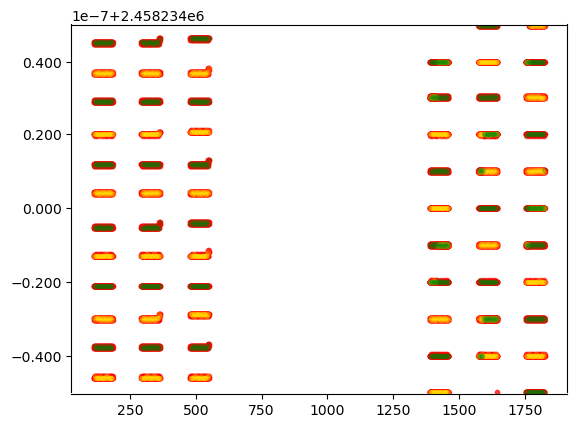

In [133]:
plt.figure()

colours = ['red', 'yellow', 'green']

for i in range(3):
    bjd = data_dict[i][0]
    sim_time = data_dict[i][7]

    plt.plot(sim_time, bjd-sim_time, '.', color=colours[i], alpha=0.2, label='BJD')

plt.ylim(np.min(bjd-sim_time), np.max(bjd-sim_time))

plt.show()

2458385.649999973


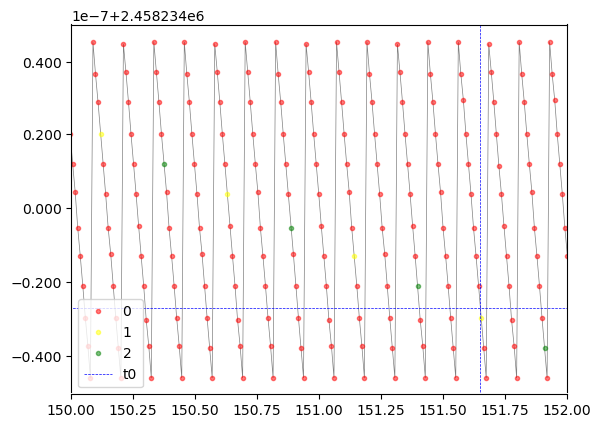

In [147]:
t0 = 151.65  # sim time (made up)

plt.figure()

colours = ['red', 'yellow', 'green']

for i in range(3):
    bjd = data_dict[i][0]
    sim_time = data_dict[i][7]

    plt.plot(sim_time, bjd-sim_time, '.', color=colours[i], alpha=0.5, label=str(i), zorder=1)

bjd = data_dict[0][0]
sim_time = data_dict[0][7]

plt.plot(sim_time, bjd-sim_time, '-', color='k', alpha=0.5, zorder=0, linewidth=0.5)

ymin = np.min(bjd-sim_time)
ymax = np.max(bjd-sim_time)

plt.vlines(t0, ymin, ymax, color='blue', linestyle='--', label='t0', linewidth=0.5)

t0_bjd = np.interp(t0, sim_time, bjd)
print(t0_bjd)
plt.hlines(t0_bjd-t0, np.min(sim_time), np.max(sim_time), color='blue', linestyle='--', linewidth=0.5)

plt.ylim(ymin, ymax)
plt.xlim(150, 152)
plt.legend(loc='lower left')

plt.show()

In [ ]:
from dynesty import pool
import dynesty
from multiprocessing import Pool

cores=10
with Pool(cores) as pool:
    sampler = dynesty.NestedSampler(fit.lnprob, 
                                    fit.prior_transform, 
                                    ndim, 
                                    pool=pool,
                                    sample='rwalk', 
                                    bound='multi',
                                    nlive=100,
                                    queue_size=cores,
                                    logl_args=[event_tc],
                                    ptform_args=[event_tc.truths]
                                    )
    sampler.run_nested(maxiter=200, checkpoint_file=path+'posteriors/'+event_name+'.save', print_progress=True)

/Users/malpas.1/Code/Gulls Debug/gulls_bug_post.py:851: RuntimeWarning: invalid value encountered in arcsin
  phase = np.arcsin(sinphase)  # sin uniform samples
/Users/malpas.1/Code/Gulls Debug/gulls_bug_post.py:851: RuntimeWarning: invalid value encountered in arcsin
  phase = np.arcsin(sinphase)  # sin uniform samples
/Users/malpas.1/Code/Gulls Debug/gulls_bug_post.py:851: RuntimeWarning: invalid value encountered in arcsin
  phase = np.arcsin(sinphase)  # sin uniform samples
/Users/malpas.1/Code/Gulls Debug/gulls_bug_post.py:851: RuntimeWarning: invalid value encountered in arcsin
  phase = np.arcsin(sinphase)  # sin uniform samples
/Users/malpas.1/Code/Gulls Debug/gulls_bug_post.py:851: RuntimeWarning: invalid value encountered in arcsin
  phase = np.arcsin(sinphase)  # sin uniform samples
/Users/malpas.1/Code/Gulls Debug/gulls_bug_post.py:851: RuntimeWarning: invalid value encountered in arcsin
  phase = np.arcsin(sinphase)  # sin uniform samples
/Users/malpas.1/Code/Gulls Debug/g

In [4]:
from scipy.stats import truncnorm
import numpy as np

def normal(u, mu, sig, bounds):
    '''Maps a uniform random variable u (between 0 and 1) to a truncated normal random value x,
    constrained between bounds[0] and bounds[1], with a mean of mu and standard deviation of sig.

    Parameters:
    u (float): Uniform random variable between 0 and 1.
    mu (float): Mean of the normal distribution.
    sig (float): Standard deviation of the normal distribution.
    bounds (tuple): Tuple containing the lower and upper bounds (bounds[0], bounds[1]).

    Returns:
    float: Truncated normal random value x constrained between bounds[0] and bounds[1].
    '''
    # Calculate the lower and upper bounds in terms of the standard normal distribution
    a, b = (bounds[0] - mu) / sig, (bounds[1] - mu) / sig
    
    # Create a truncated normal distribution
    trunc_normal = truncnorm(a, b, loc=mu, scale=sig)
    
    # Map the uniform random variable to the truncated normal distribution
    x = trunc_normal.ppf(u)
    
    return x


[6.40181934e-01 3.79675088e-01 3.39535139e-01 6.11810061e-01
 7.33976382e-01 7.22566378e-01 1.92013225e-01 8.30149768e-01
 9.49978986e-01 2.98919059e-02 3.40430543e-01 8.58342934e-01
 3.81167689e-02 1.63728594e-01 2.92186362e-02 4.42384110e-01
 8.26384442e-01 5.80188069e-01 8.38095854e-01 6.18455469e-02
 9.22618169e-01 3.92778547e-01 6.50554882e-02 5.62886020e-01
 5.98327495e-01 3.96470415e-01 7.09667055e-01 4.96926347e-01
 4.95318554e-02 5.39667360e-01 8.95233317e-01 6.25600076e-01
 4.88076972e-01 6.12388927e-01 6.67597014e-01 9.62105852e-01
 7.58663230e-01 6.09501578e-01 1.53713516e-01 6.54908766e-01
 6.11719021e-02 5.36508422e-03 8.59342107e-01 5.67393443e-02
 7.23291344e-01 4.62066875e-01 8.53650633e-01 6.37222908e-01
 6.16237117e-01 7.87164286e-01 3.09634179e-01 5.13709313e-02
 2.65490770e-02 3.97966043e-01 1.81220875e-01 5.07715333e-01
 6.92265580e-01 7.15349926e-01 7.89862624e-01 6.79291063e-02
 5.58468561e-01 6.27446565e-01 3.61469655e-01 4.62686274e-02
 1.48740161e-01 9.031171

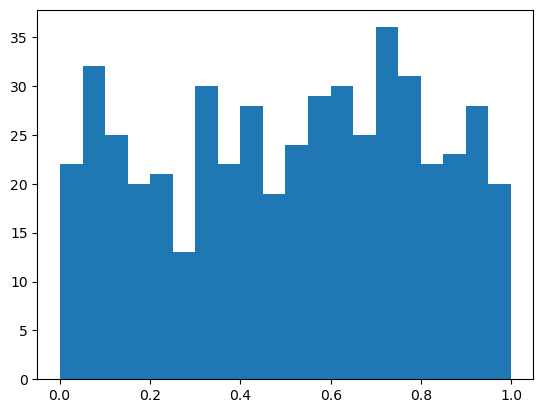

In [7]:
import matplotlib.pyplot as plt

u = np.random.rand(500)
plt.hist(u, bins=20)
print(u)

Yip, that uniform.

In [17]:
u = np.random.rand(10)

mu = np.random.rand(10) * 20
print(mu)

sig = np.random.rand(10) * 20

x = normal(u, mu, sig/4.0, (-sig, sig))

print(x)

[10.02934042  1.96219687 10.94475716 12.00062918 19.10136929 17.52148111
  9.12254483  9.93840866 15.39112069  3.36367187]
[14.45377302  1.32952003  9.12391617  4.34096049  8.97194983 13.94757983
  1.53224553  7.75205079 14.92696493  6.1044759 ]


In [ ]:
logs = normal(logs, logs_true, logs_range/5.0, [logs_true-logs_range, logs_true+logs_range])
logq = normal(logq, logq_true, logq_range/5.0, [logq_true-logq_range, logq_true+logq_range])
logrho = normal(logrho, logrho_true, logrho_range/5.0, [logrho_true-logrho_range, logrho_true+logrho_range])
u0 = normal(u0, u0_true, u0_range/5.0, [u0_true-u0_range, u0_true+u0_range])
alpha = normal(alpha, alpha_true, alpha_range/5.0, [alpha_true-alpha_range, alpha_true+alpha_range])
t0 = normal(t0, t0_true, t0_range/5.0, [t0_true-t0_range, t0_true+t0_range])
tE = normal(tE, tE_true, tE_range/5.0, [tE_true-tE_range, tE_true+tE_range])
piEE = normal(piEE, piEE_true, piEE_range/5.0, [piEE_true-piEE_range, piEE_true+piEE_range])
piEN = normal(piEN, piEN_true, piEN_range/5.0, [piEN_true-piEN_range, piEN_true+piEN_range])
i = normal(i, i_true, i_range/5.0, [i_true-i_range, i_true+i_range])
sinphase = normal(sinphase, sinphase_true, sinphase_range/5.0, [sinphase_true-sinphase_range, sinphase_true+sinphase_range])
logperiod = normal(logperiod, logperiod_true, logperiod_range/5.0, [logperiod_true-logperiod_range, logperiod_true+logperiod_range])

Time taken: 0.020030975341796875 s


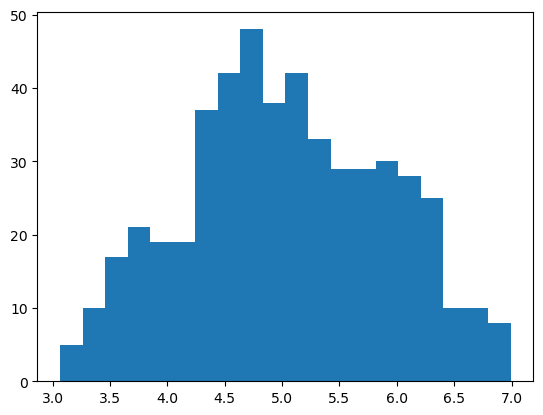

In [23]:
import time
start_time = time.time()

u = np.random.rand(500)
mu = np.ones(500) * 5
sig = np.ones(500)
bound = sig*2
minb = mu - bound
maxb = mu + bound

x = normal(u, mu, sig, (minb, maxb))

plt.hist(x, bins=20)

end_time = time.time()
print('Time taken:', end_time - start_time, 's')